In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#Load the file
Loan_DS = pd.read_csv("C:\\Users\\ARCABH\\Desktop\\AIML\\Case Study\\loan\\loan.csv")
print(Loan_DS)


            id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ...  \
0       36 months   10.65%       162.87     B        B2  ...   
1       60 months   15.27%     

In [2]:
#checking which column has NAN value more than 30% and removing them from Dataset
Column = Loan_DS.isnull().mean()*100
Empty=Column>30
cols_to_drop =Empty[Empty==1].index
print(cols_to_drop)
Loan_DS=Loan_DS.drop(cols_to_drop, axis=1)
print(Loan_DS)
#removing unwanted column as no analysis can be done with identification and URl and zipcode last part is xx as in title information is very inconsistent
#there is no Good information in emp title to analyse
not_required_columns = ["id","member_id","url","zip_code","title","emp_title"]
Loan_DS.drop(labels = not_required_columns, axis =1, inplace=True)




Index(['desc', 'mths_since_last_delinq', 'mths_since_last_record',
       'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint',
       'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
     

In [3]:
Column = Loan_DS.isnull().mean()*100
print(Column)
#repcaling empty places in 'emp_length',,'last_pymnt_d','last_credit_pull_d' with Not avaliable
Loan_DS[['emp_length','last_pymnt_d','last_credit_pull_d']] = Loan_DS[['emp_length','last_pymnt_d','last_credit_pull_d']].fillna('Not Available')
Column = Loan_DS.isnull().mean()*100
print(Column)

loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_length                    2.706650
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
purpose                       0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line              0.000000
inq_last_6mths                0.000000
open_acc                      0.000000
pub_rec                       0.000000
revol_bal                     0.000000
revol_util                    0.125891
total_acc                

In [4]:
#repcaling empty places in 'pub_rec_bankruptcies','tax_liens','collections_12_mths_ex_med','chargeoff_within_12_mths' with mode data

Mod_pub_rec_bankruptcies=Loan_DS["pub_rec_bankruptcies"].mode()[0]
print(Mod_pub_rec_bankruptcies)
Mod_tax_liens=Loan_DS["tax_liens"].mode()[0]
print(Mod_tax_liens)
Mod_collections_12_mths_ex_med=Loan_DS["collections_12_mths_ex_med"].mode()[0]
print(Mod_collections_12_mths_ex_med)
Mod_chargeoff_within_12_mths=Loan_DS["chargeoff_within_12_mths"].mode()[0]
print(Mod_chargeoff_within_12_mths)


Loan_DS['collections_12_mths_ex_med'] = Loan_DS['collections_12_mths_ex_med'].fillna(Mod_collections_12_mths_ex_med)
Loan_DS['pub_rec_bankruptcies'] = Loan_DS['pub_rec_bankruptcies'].fillna(Mod_pub_rec_bankruptcies)
Loan_DS['tax_liens'] = Loan_DS['tax_liens'].fillna(Mod_tax_liens)
Loan_DS['chargeoff_within_12_mths'] = Loan_DS['chargeoff_within_12_mths'].fillna(Mod_chargeoff_within_12_mths)
Column = Loan_DS.isnull().mean()*100
print(Column)

0.0
0.0
0.0
0.0
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_length                    0.000000
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
purpose                       0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line              0.000000
inq_last_6mths                0.000000
open_acc                      0.000000
pub_rec                       0.000000
revol_bal                     0.000000
revol_util                    0.125891
total_acc

In [89]:
#removing % from revol_util so that median can be calculated and fill in not avaliable data with median
Loan_DS['revol_util']=(pd.to_numeric(Loan_DS['revol_util'].str.replace(r'%', '')))
Median_revol_util=Loan_DS["revol_util"].median()
print(Median_revol_util)
Loan_DS['revol_util'] = Loan_DS['revol_util'].fillna(Median_revol_util)
Column = Loan_DS.isnull().mean()*100
print(Column)

49.3
loan_amnt                     0.0
funded_amnt                   0.0
funded_amnt_inv               0.0
term                          0.0
int_rate                      0.0
installment                   0.0
grade                         0.0
sub_grade                     0.0
emp_length                    0.0
home_ownership                0.0
annual_inc                    0.0
verification_status           0.0
issue_d                       0.0
loan_status                   0.0
pymnt_plan                    0.0
purpose                       0.0
addr_state                    0.0
dti                           0.0
delinq_2yrs                   0.0
earliest_cr_line              0.0
inq_last_6mths                0.0
open_acc                      0.0
pub_rec                       0.0
revol_bal                     0.0
revol_util                    0.0
total_acc                     0.0
initial_list_status           0.0
out_prncp                     0.0
out_prncp_inv                 0.0
total_pym

In [5]:
#removing column with same data for every index
print(Loan_DS.shape)
Loan_DS.nunique()
nunique = Loan_DS.nunique()
cols_to_drop_nunique = nunique[nunique == 1].index
print(cols_to_drop_nunique)
#
Loan_DS=Loan_DS.drop(cols_to_drop_nunique, axis=1)
print(Loan_DS.shape)

(39717, 47)
Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')
(39717, 38)


In [6]:
#converting column to numneric type
numeric_columns = ['loan_amnt','funded_amnt','funded_amnt_inv','installment','annual_inc','dti']
Loan_DS[numeric_columns] = Loan_DS[numeric_columns].apply(pd.to_numeric)
#removing %from interest rate so that analysis can be done
Loan_DS['int_rate']=(pd.to_numeric(Loan_DS['int_rate'].str.replace(r'%', '')))

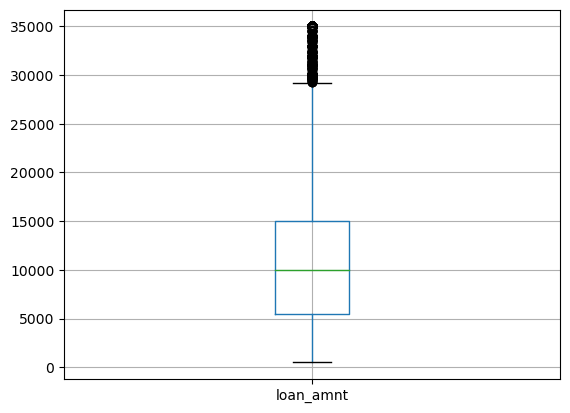

(39717, 38)
[   31    80   128 ... 19825 19838 19857]
[  223   540   601   616   733  1156  1199  1619  1691  1799  1839  2075
  2447  2592  2603  2749  2801  3006  3017  3094  3298  3308  3374  3655
  4099  4214  4314  4408  4652  4873  4913  5180  5267  5284  5469  5472
  5479  5570  5603  5742  5782  5820  5964  5966  6243  6338  6456  6839
  7446  7458  7466  7479  7764  7903  7904  7910  8184  8305  9816  9854
 10317 10380 10533 10553 10661 11435 12278 13136 13138 13371 13403 13470
 13486 13489 13492 14089 14600 15414]
[   74    80   170 ... 39706 39707 39715]
[16387, 16389, 16391, 24585, 8204, 16401, 16404, 24596, 16408, 24602, 8220, 32798, 31, 16418, 24611, 8233, 16431, 16437, 8250, 8251, 24635, 8252, 16446, 32827, 16448, 32836, 8263, 74, 32845, 16462, 80, 8273, 16471, 24667, 8289, 16483, 8293, 32870, 24683, 32875, 16493, 8302, 16497, 8306, 8305, 8310, 8313, 24700, 8317, 16511, 128, 32897, 8327, 8331, 24717, 16527, 24719, 32913, 8338, 8340, 16536, 8348, 32924, 24733, 8353, 8359,

In [13]:
#make list of outliner

def outliner(df,column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
 
    # Create arrays of Boolean values indicating the outlier rows
    upper_array = np.where(df[column]>=upper)[0]
    lower_array = np.where(df[column]<=lower)[0]
    array=np.concatenate((upper_array, lower_array.T))
    return array
array_loan_amnt=outliner(Loan_DS,"loan_amnt")
array_int_rate=outliner(Loan_DS,"int_rate")
array_annual_inc=outliner(Loan_DS,"annual_inc")
print(array_loan_amnt)
print(array_int_rate)
print(array_annual_inc)
resultList= list(set(array_loan_amnt) | set(array_int_rate)|set(array_annual_inc))
resultList.sort()
print(resultList)


In [14]:
# Removing the outliers
Loan_DS.drop(index=resultList, inplace=True)

print(Loan_DS)

       loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
0           5000         5000           4975.0   36 months     10.65   
1           2500         2500           2500.0   60 months     15.27   
2           2400         2400           2400.0   36 months     15.96   
3          10000        10000          10000.0   36 months     13.49   
4           3000         3000           3000.0   60 months     12.69   
...          ...          ...              ...         ...       ...   
39711       5000         5000            700.0   36 months      8.70   
39712       2500         2500           1075.0   36 months      8.07   
39713       8500         8500            875.0   36 months     10.28   
39714       5000         5000           1325.0   36 months      8.07   
39716       7500         7500            800.0   36 months     13.75   

       installment grade sub_grade emp_length home_ownership  ...  \
0           162.87     B        B2  10+ years           RENT  ... 

In [25]:
#remove non valueable data like others or none 
print((Loan_DS.purpose.value_counts()*100)/len(Loan_DS))
del_loan_purpose = (Loan_DS.purpose.value_counts()*100)/len(Loan_DS)
del_loan_purpose = del_loan_purpose[(del_loan_purpose < 0.50) | (del_loan_purpose.index == 'other')]
Loan_DS.drop(labels = Loan_DS[Loan_DS.purpose.isin(del_loan_purpose.index)].index, inplace=True)

print((Loan_DS.home_ownership.value_counts()*100)/len(Loan_DS))
del_home_ownership = (Loan_DS.home_ownership.value_counts()*100)/len(Loan_DS)
del_home_ownership = del_home_ownership[(del_home_ownership.index == 'NONE')|(del_home_ownership.index == 'OTHER')]
Loan_DS.drop(labels = Loan_DS[Loan_DS.home_ownership.isin(del_home_ownership.index)].index, inplace=True)
print(Loan_DS.shape)
print(Loan_DS.home_ownership.unique())




debt_consolidation    52.494472
credit_card           14.512465
home_improvement       7.815103
major_purchase         6.270257
small_business         4.873838
car                    4.552752
wedding                2.747403
medical                1.962863
moving                 1.684185
vacation               1.123800
house                  1.014752
educational            0.948111
Name: purpose, dtype: float64
RENT        48.726259
MORTGAGE    43.404114
OWN          7.624269
OTHER        0.242329
NONE         0.003029
Name: home_ownership, dtype: float64
(32932, 38)
['RENT' 'OWN' 'MORTGAGE']


In [26]:
print(Loan_DS.nunique())


loan_amnt                    809
funded_amnt                  908
funded_amnt_inv             6744
term                           2
int_rate                     356
installment                13604
grade                          7
sub_grade                     35
emp_length                    12
home_ownership                 3
annual_inc                  4357
verification_status            3
issue_d                       55
loan_status                    3
purpose                       12
addr_state                    50
dti                         2846
delinq_2yrs                   10
earliest_cr_line             518
inq_last_6mths                 9
open_acc                      38
pub_rec                        5
revol_bal                  19138
revol_util                  1069
total_acc                     80
out_prncp                    827
out_prncp_inv                829
total_pymnt                31442
total_pymnt_inv            31229
total_rec_prncp             6479
total_rec_

In [27]:
#create list of continous and catagorical columns
Cat_cols=["term","grade","pub_rec_bankruptcies","pub_rec","inq_last_6mths","delinq_2yrs","loan_status","home_ownership","emp_length","sub_grade","addr_state","verification_status"]
Con_cols=["loan_amnt","int_rate","annual_inc"]



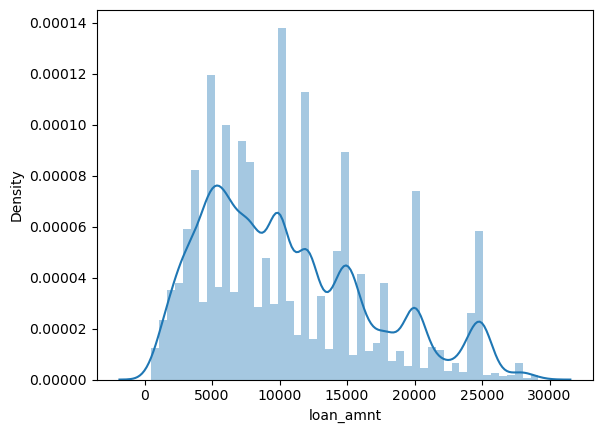

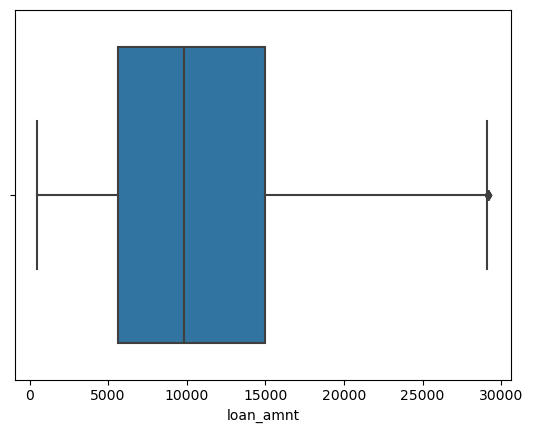

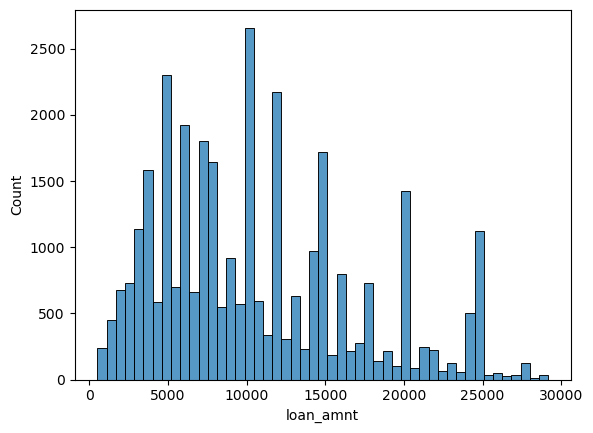

count    32932.000000
mean     10626.402132
std       6317.545884
min        500.000000
25%       5600.000000
50%       9800.000000
75%      15000.000000
max      29175.000000
Name: loan_amnt, dtype: float64


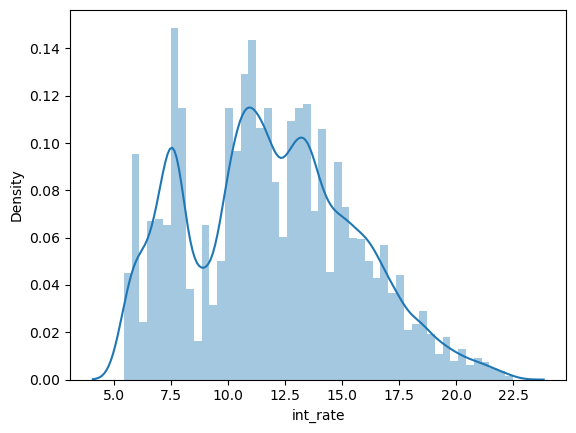

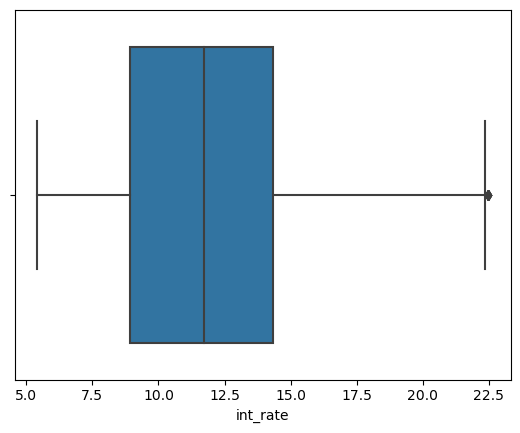

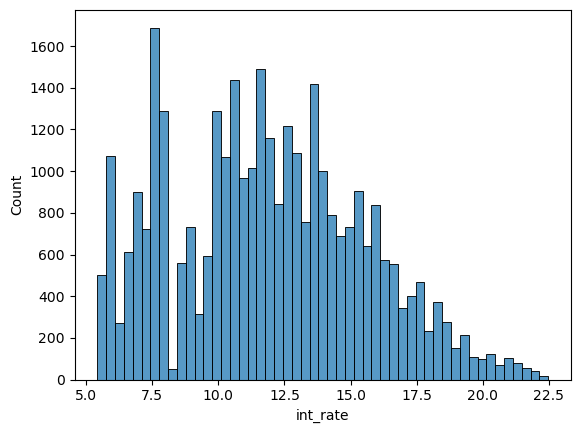

count    32932.000000
mean        11.883561
std          3.636129
min          5.420000
25%          8.940000
50%         11.710000
75%         14.350000
max         22.480000
Name: int_rate, dtype: float64


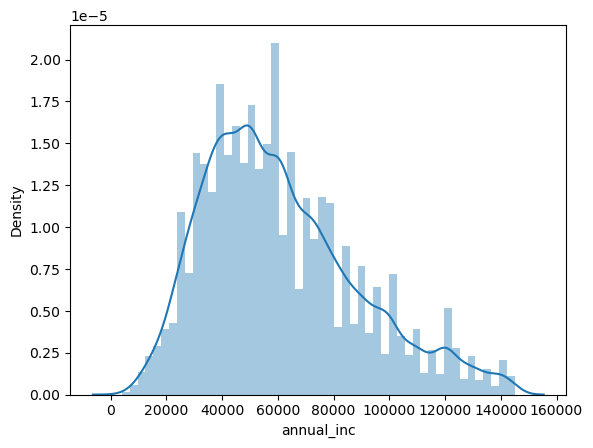

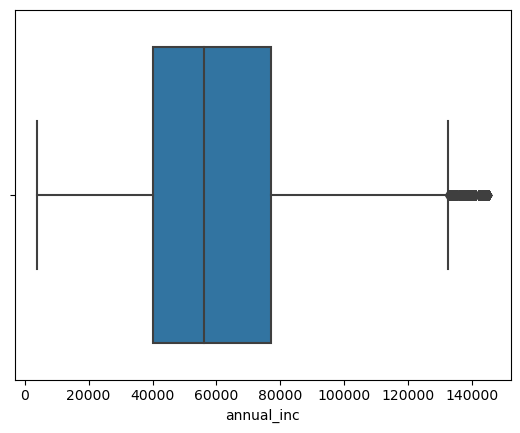

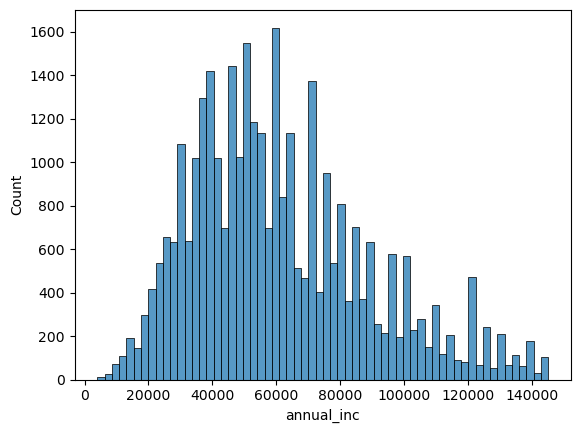

count     32932.000000
mean      61055.617700
std       27768.512188
min        4000.000000
25%       40000.000000
50%       56000.000000
75%       77000.000000
max      145008.000000
Name: annual_inc, dtype: float64


In [28]:
#plot graph Con_cols
for i in Con_cols:
    sns.distplot(Loan_DS[i])
    plt.show()
    sns.boxplot(data =Loan_DS, x=i)
    plt.show()
    sns.histplot(Loan_DS[i])
    plt.show()
    print(Loan_DS[i].describe())
    

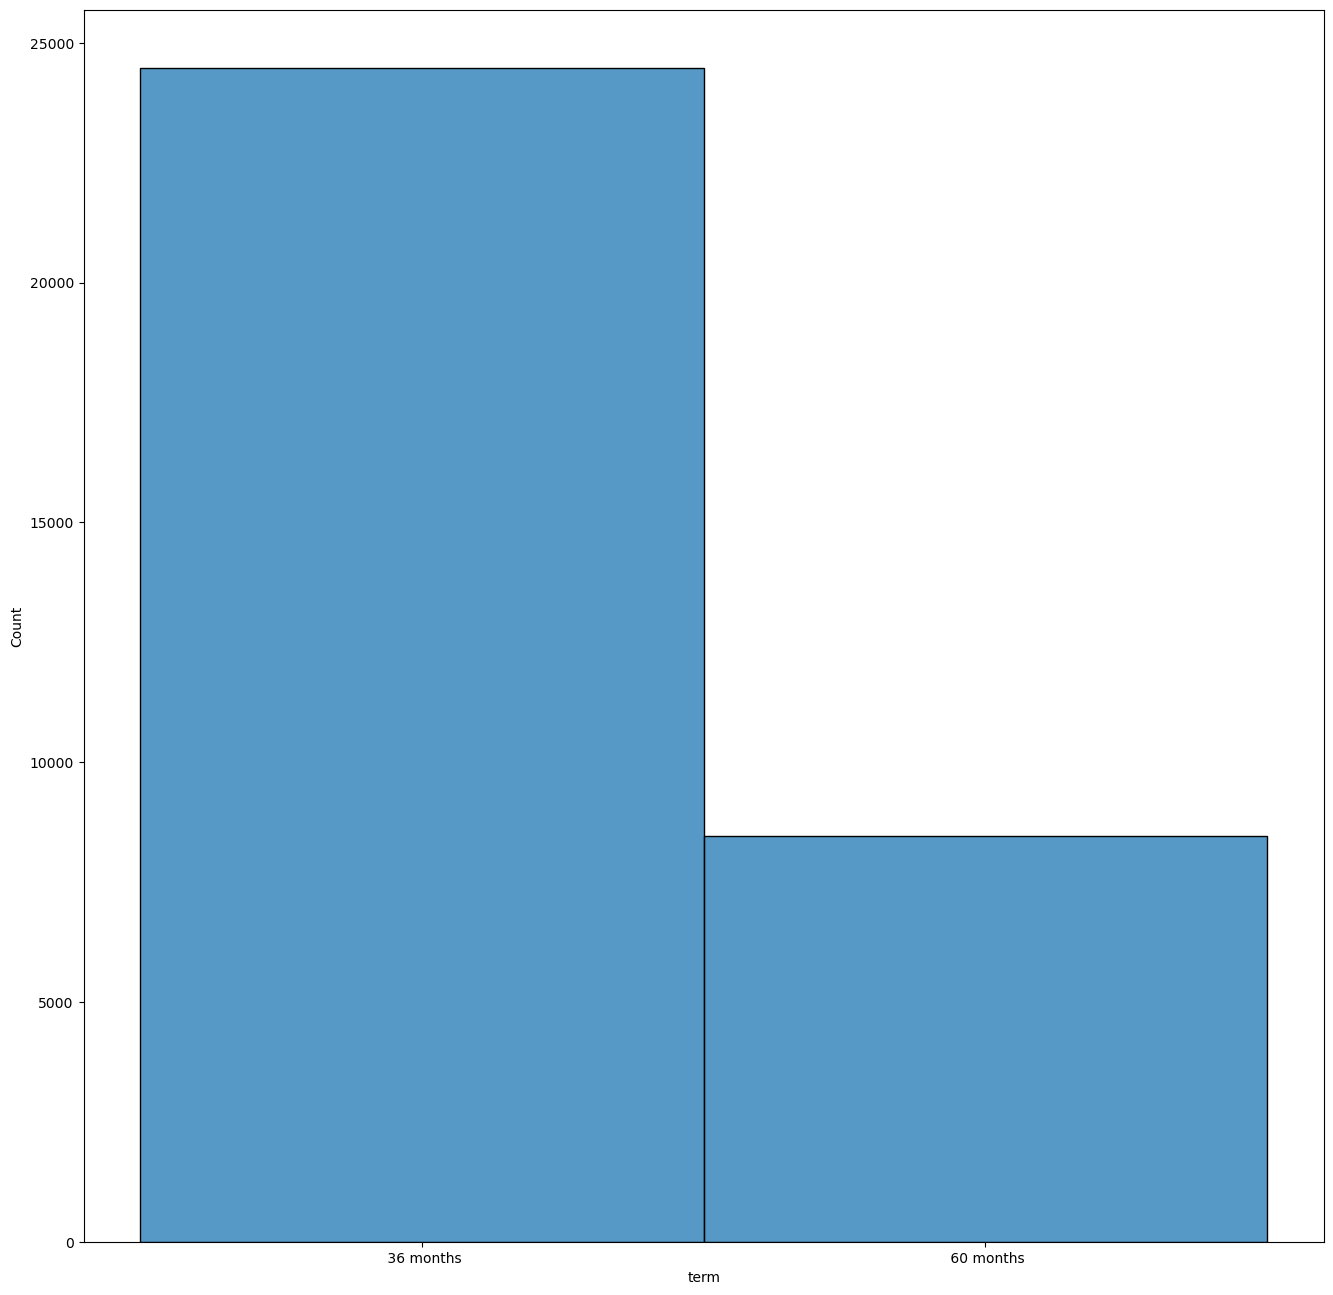

count          32932
unique             2
top        36 months
freq           24465
Name: term, dtype: object


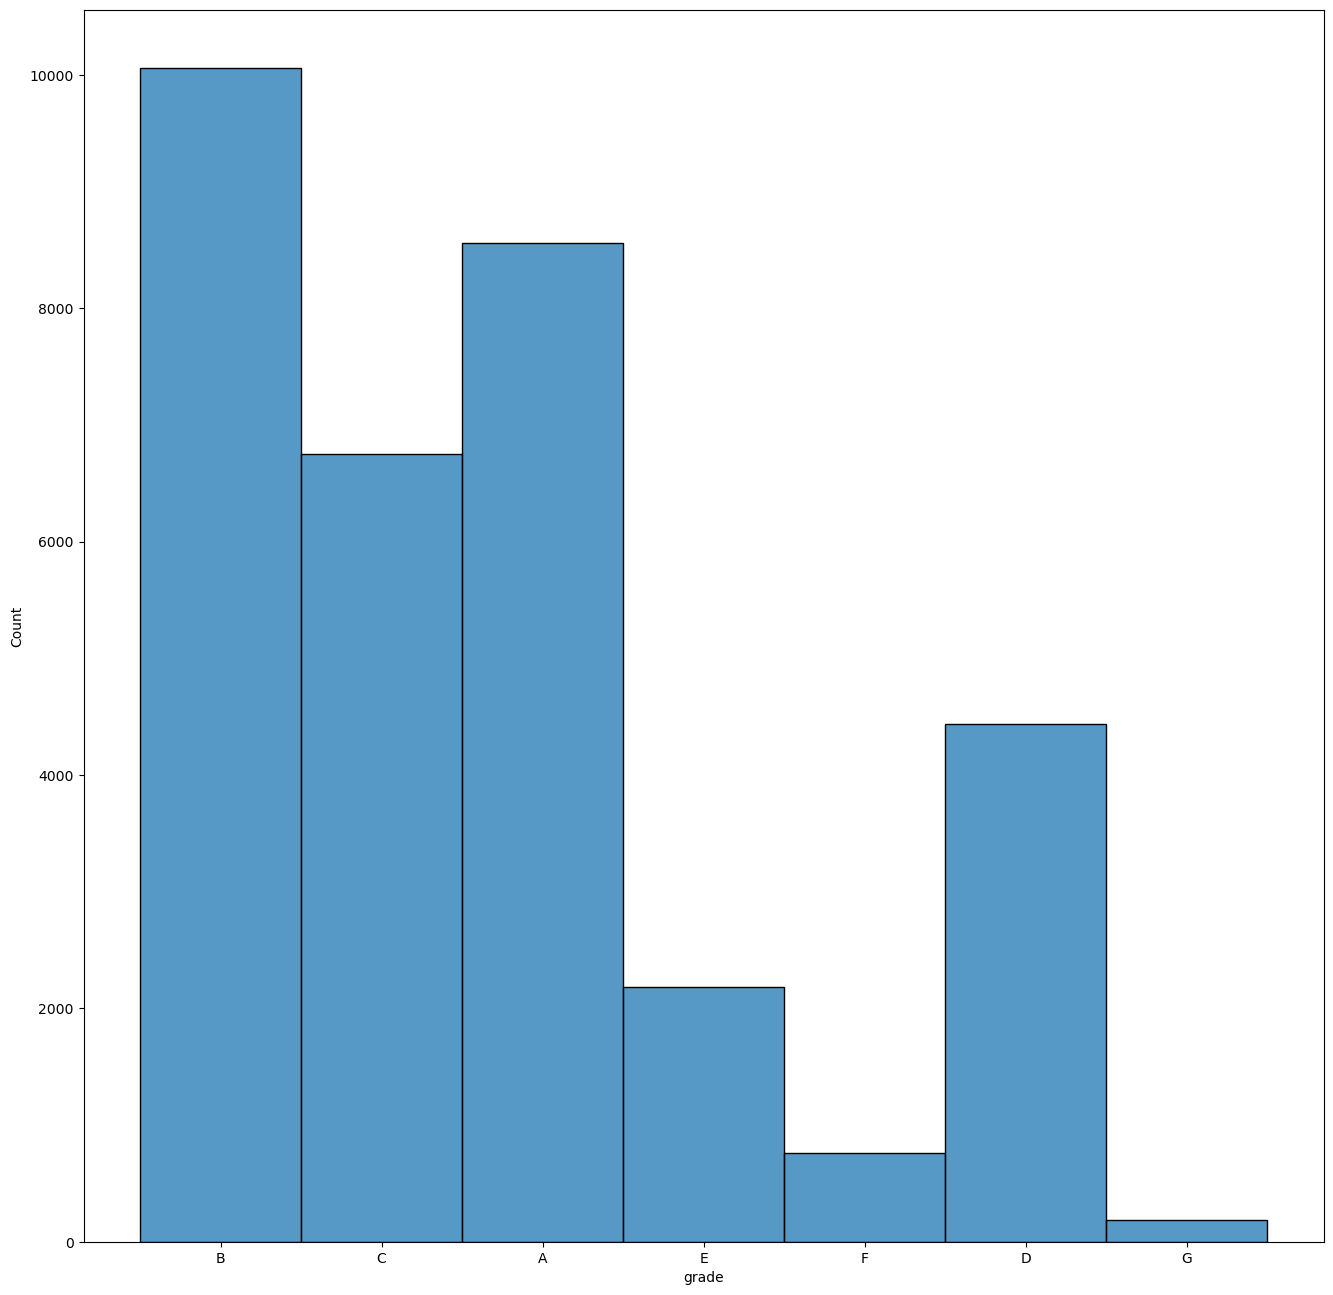

count     32932
unique        7
top           B
freq      10057
Name: grade, dtype: object


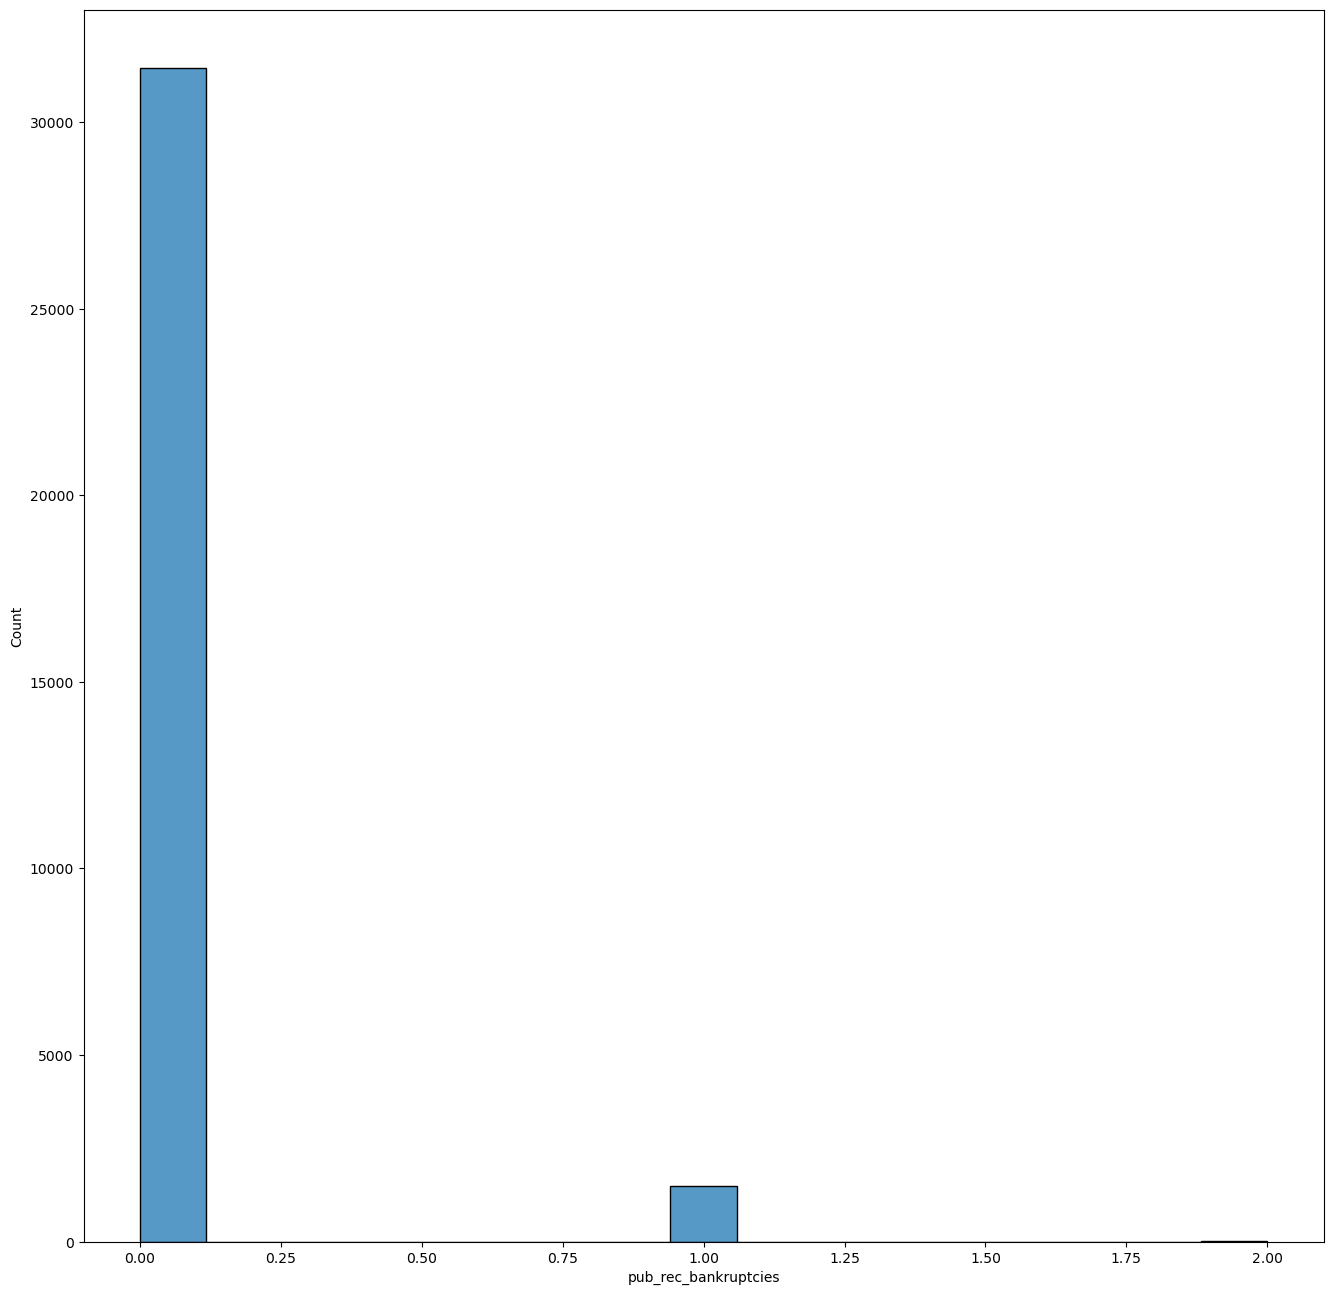

count    32932.000000
mean         0.045336
std          0.208771
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64


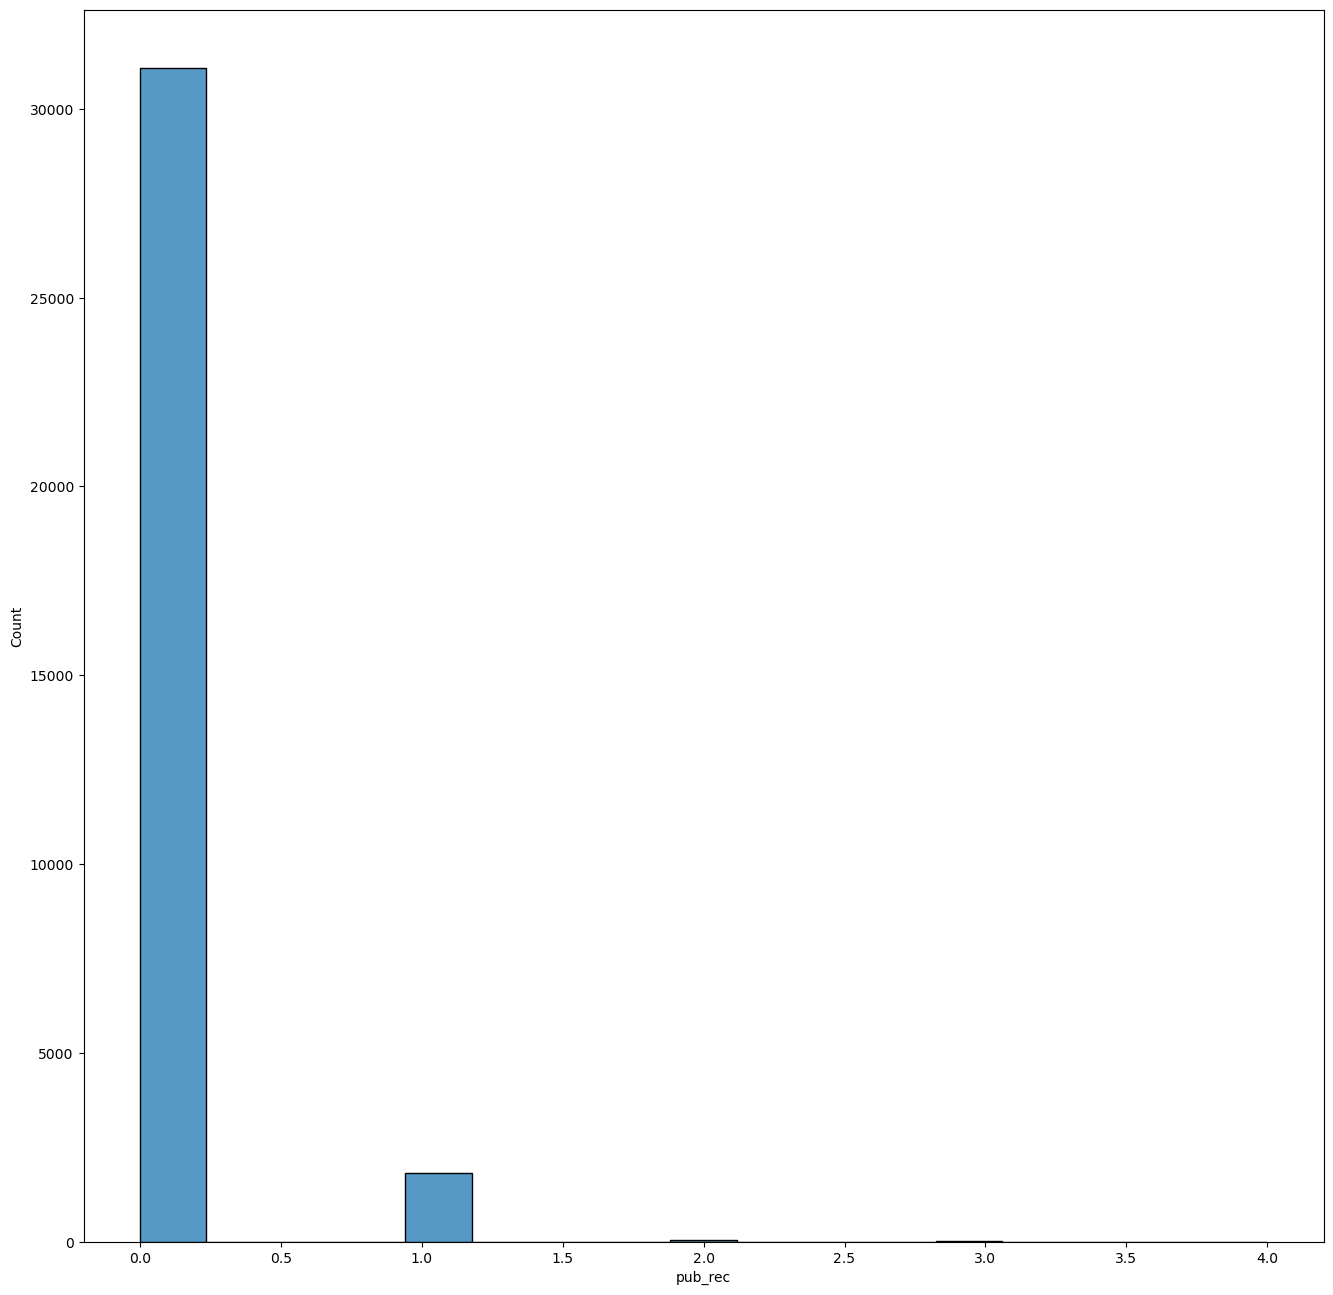

count    32932.000000
mean         0.058089
std          0.242583
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: pub_rec, dtype: float64


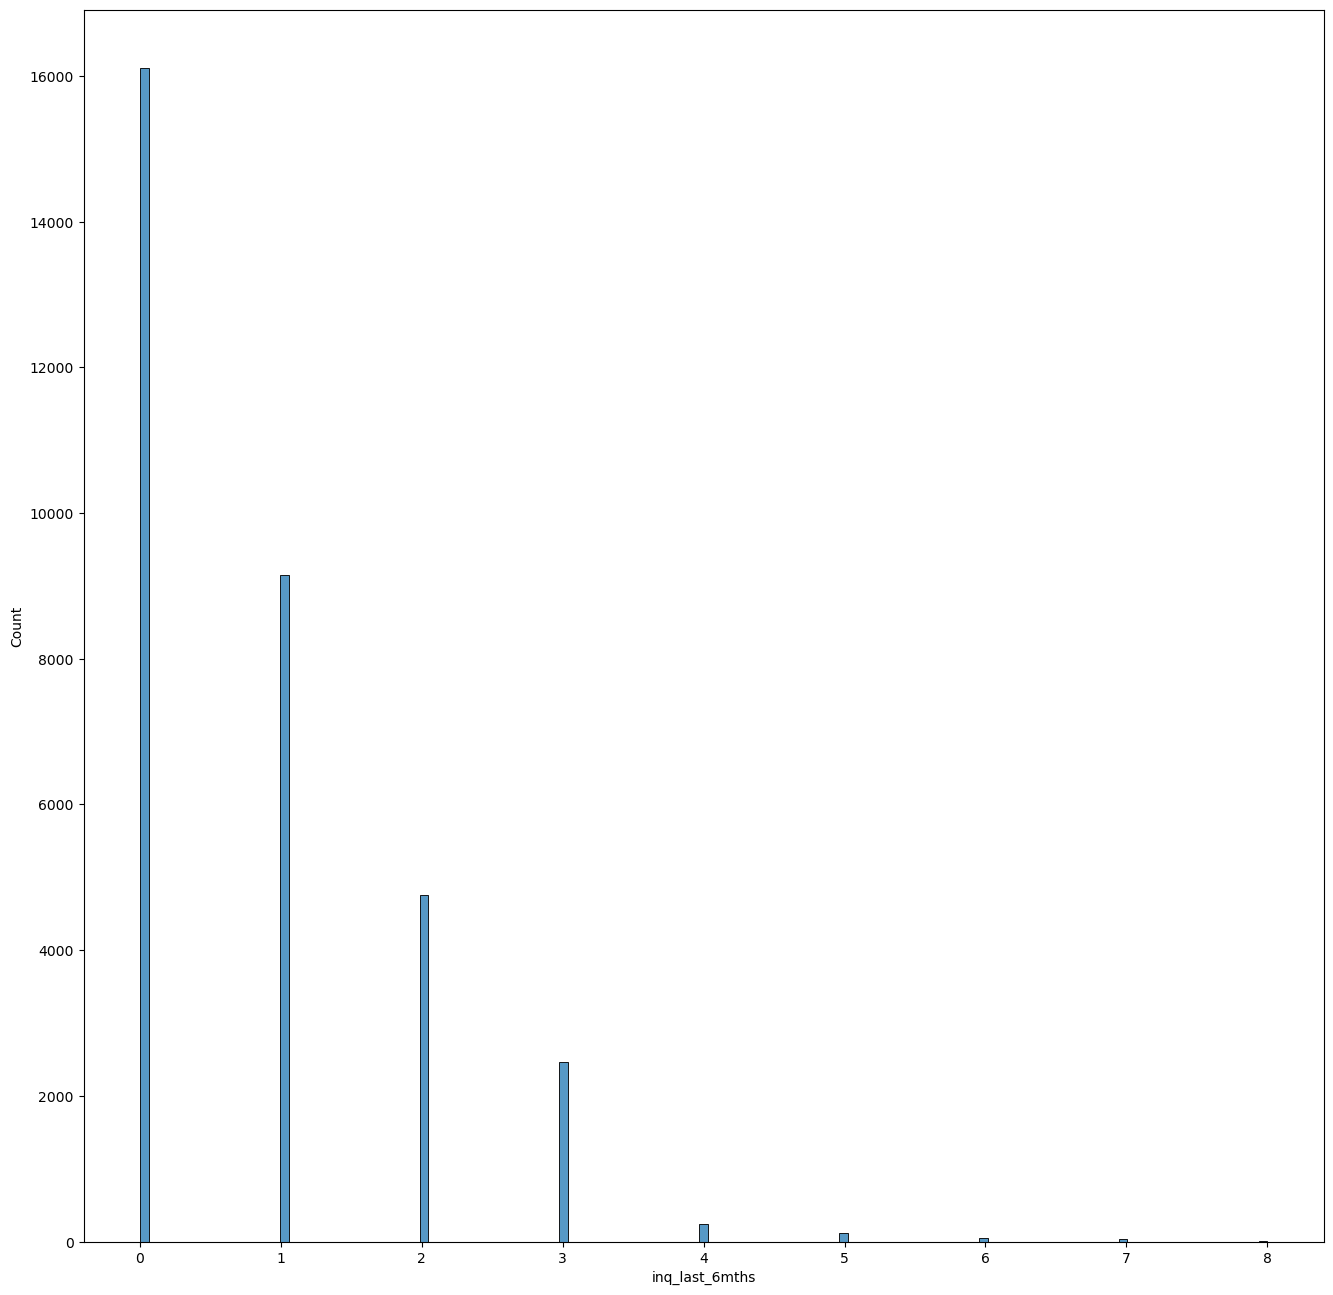

count    32932.000000
mean         0.857069
std          1.060186
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: inq_last_6mths, dtype: float64


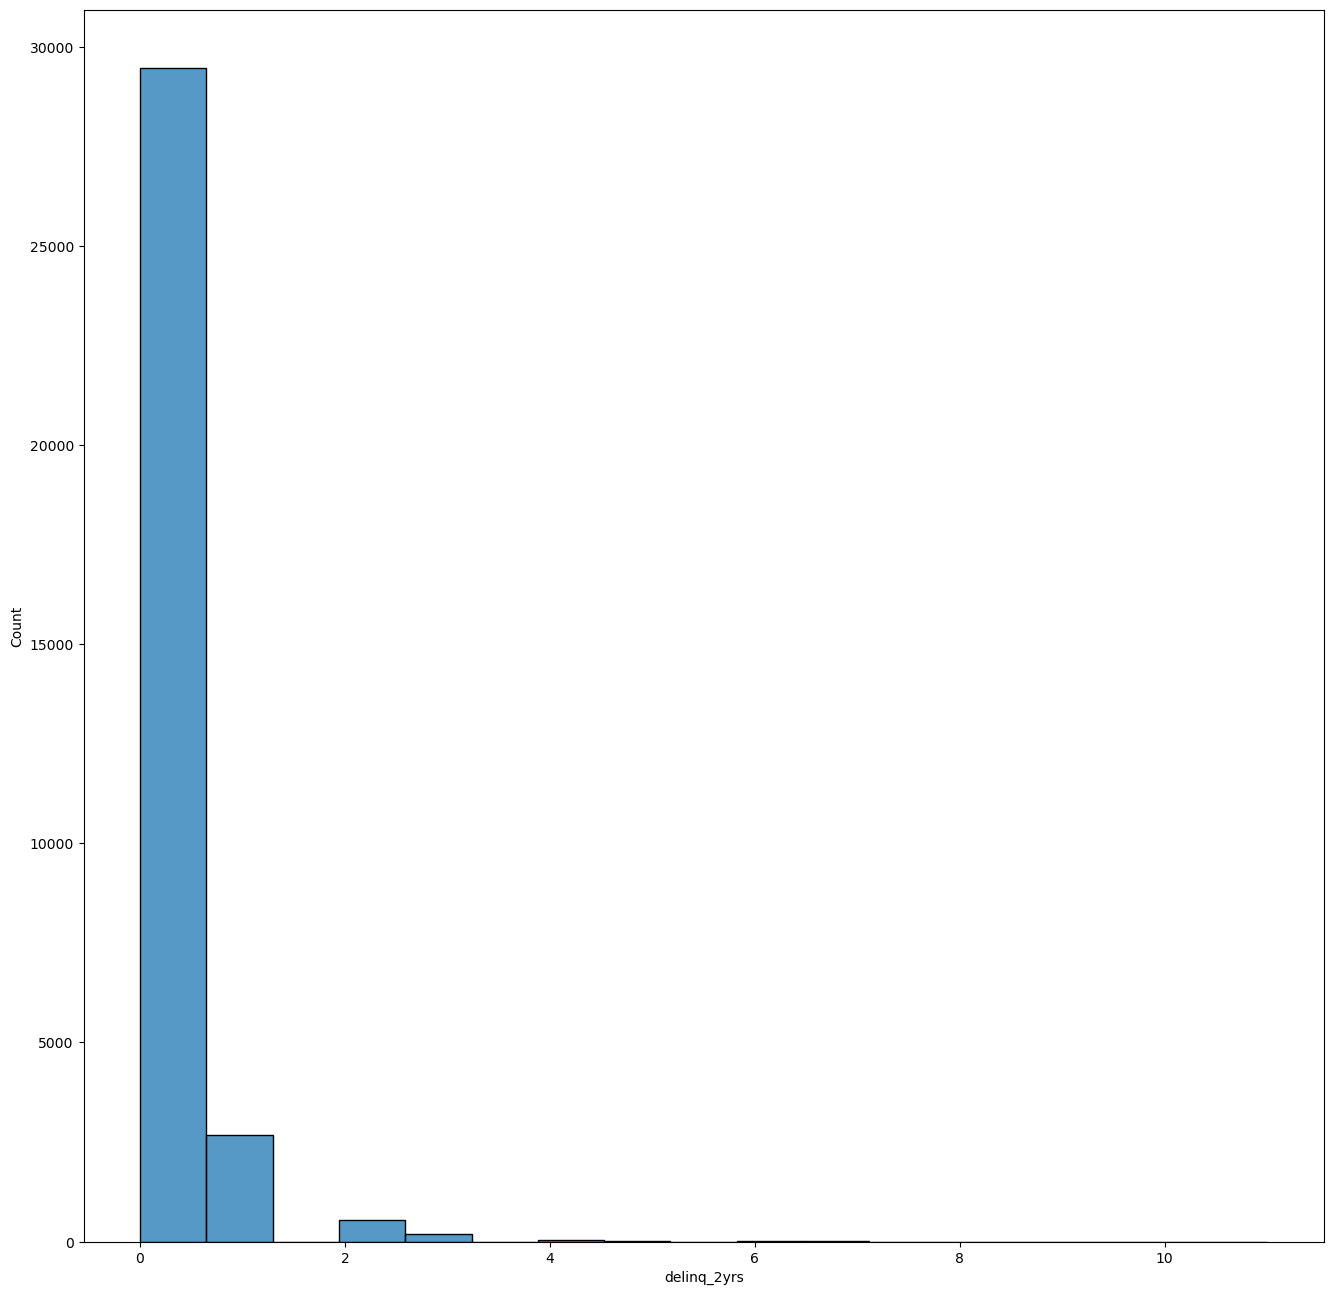

count    32932.000000
mean         0.141504
std          0.483821
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.000000
Name: delinq_2yrs, dtype: float64


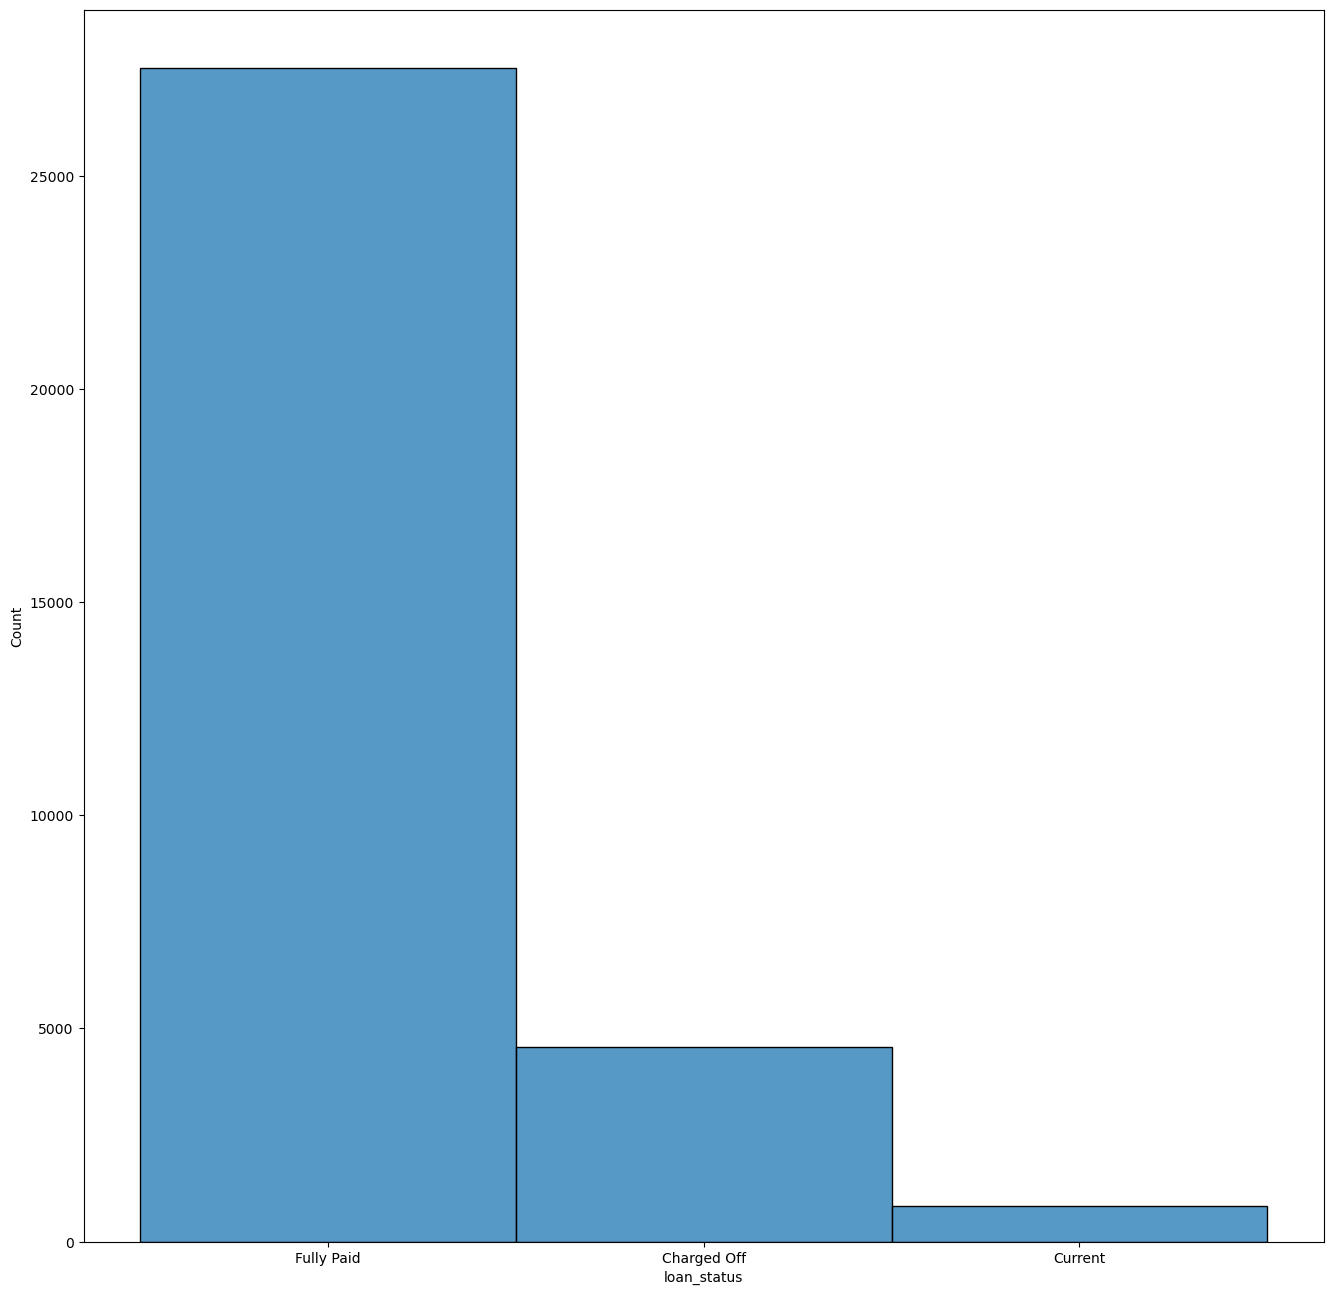

count          32932
unique             3
top       Fully Paid
freq           27532
Name: loan_status, dtype: object


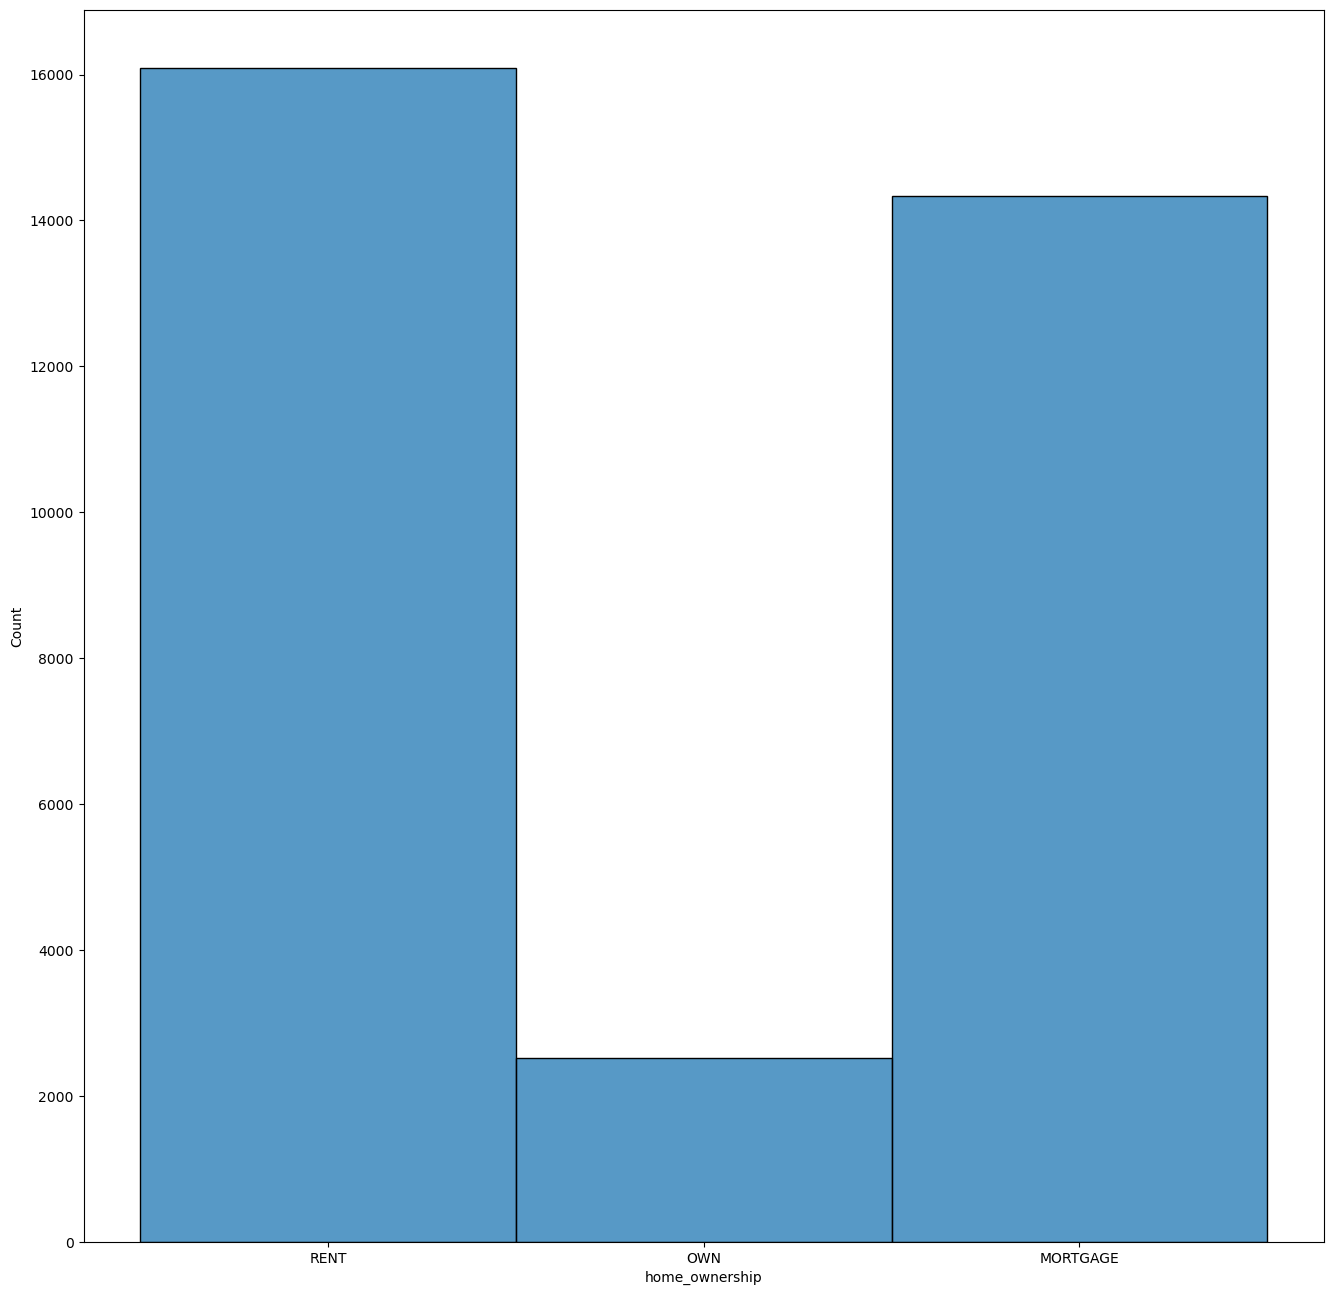

count     32932
unique        3
top        RENT
freq      16086
Name: home_ownership, dtype: object


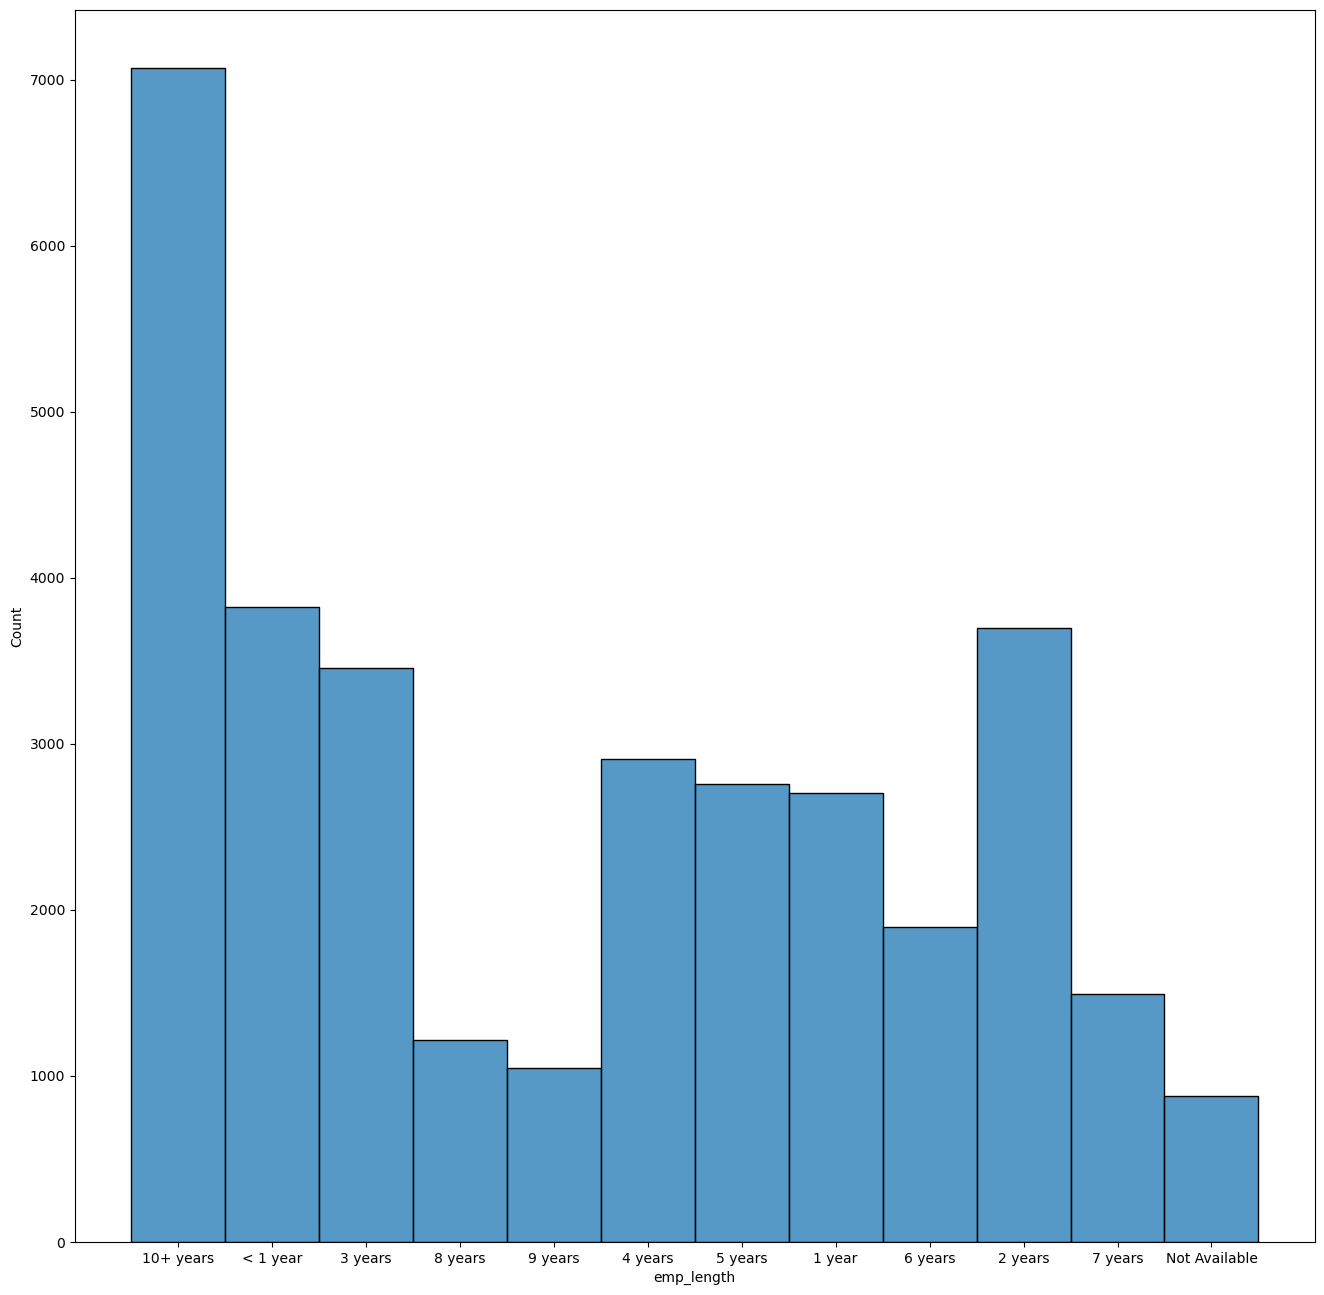

count         32932
unique           12
top       10+ years
freq           7068
Name: emp_length, dtype: object


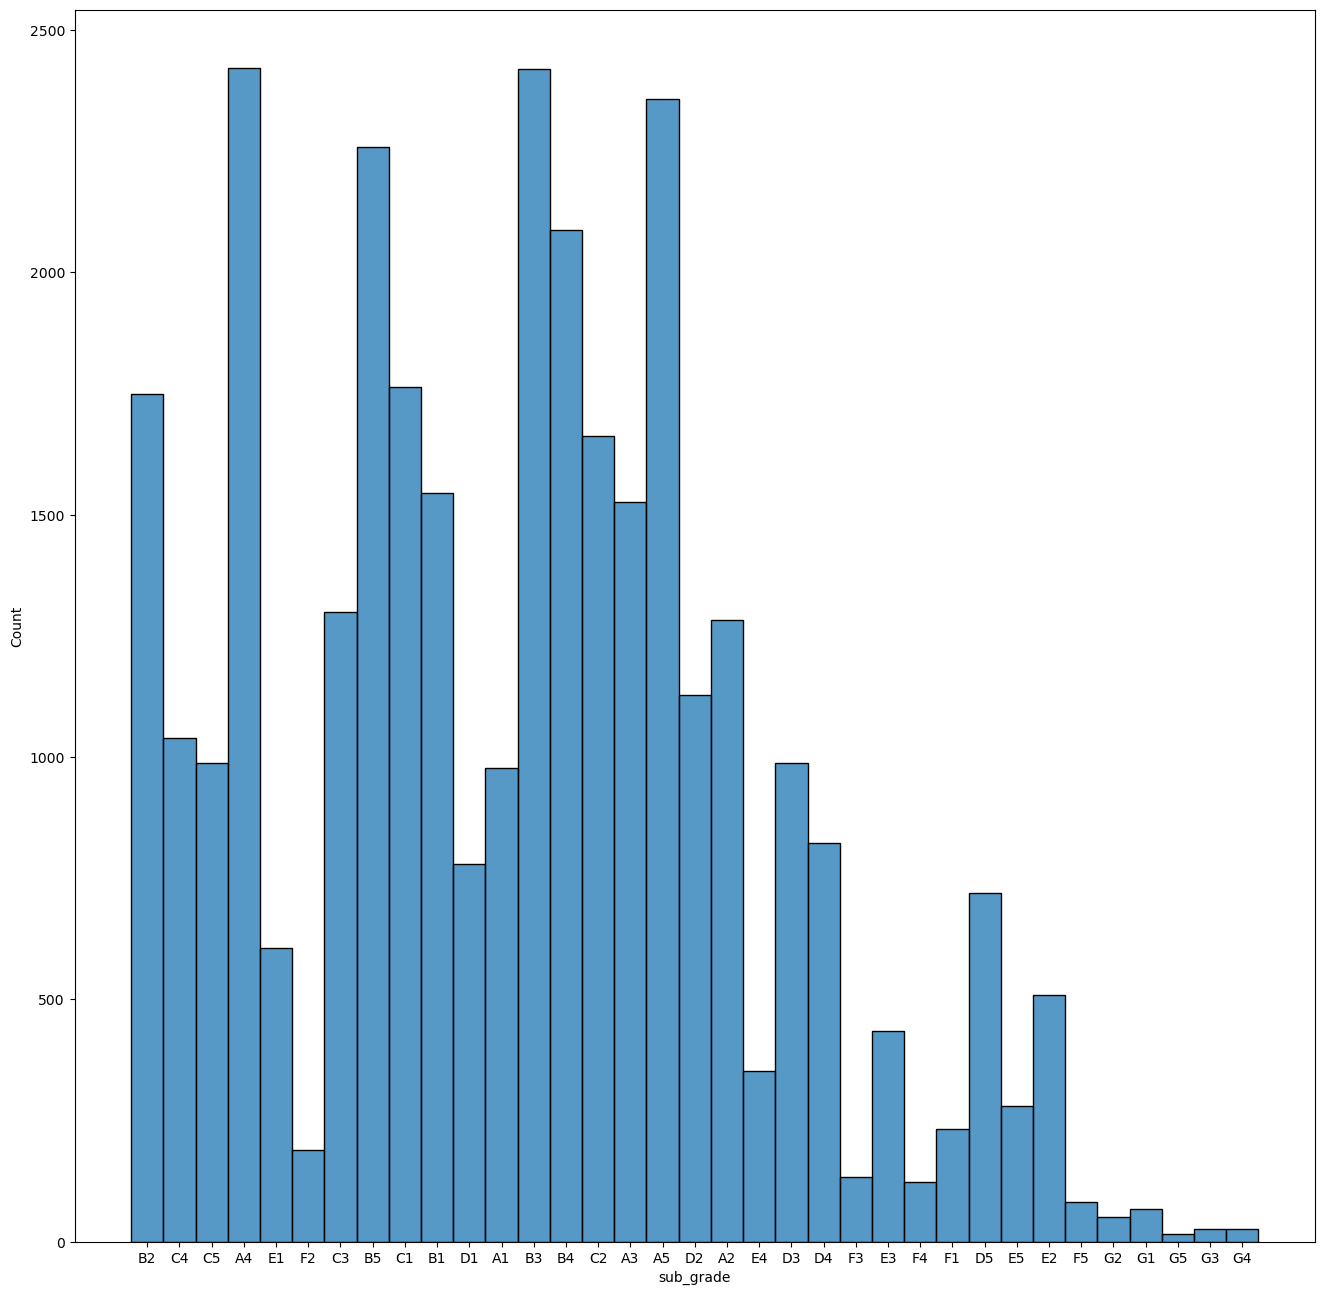

count     32932
unique       35
top          A4
freq       2421
Name: sub_grade, dtype: object


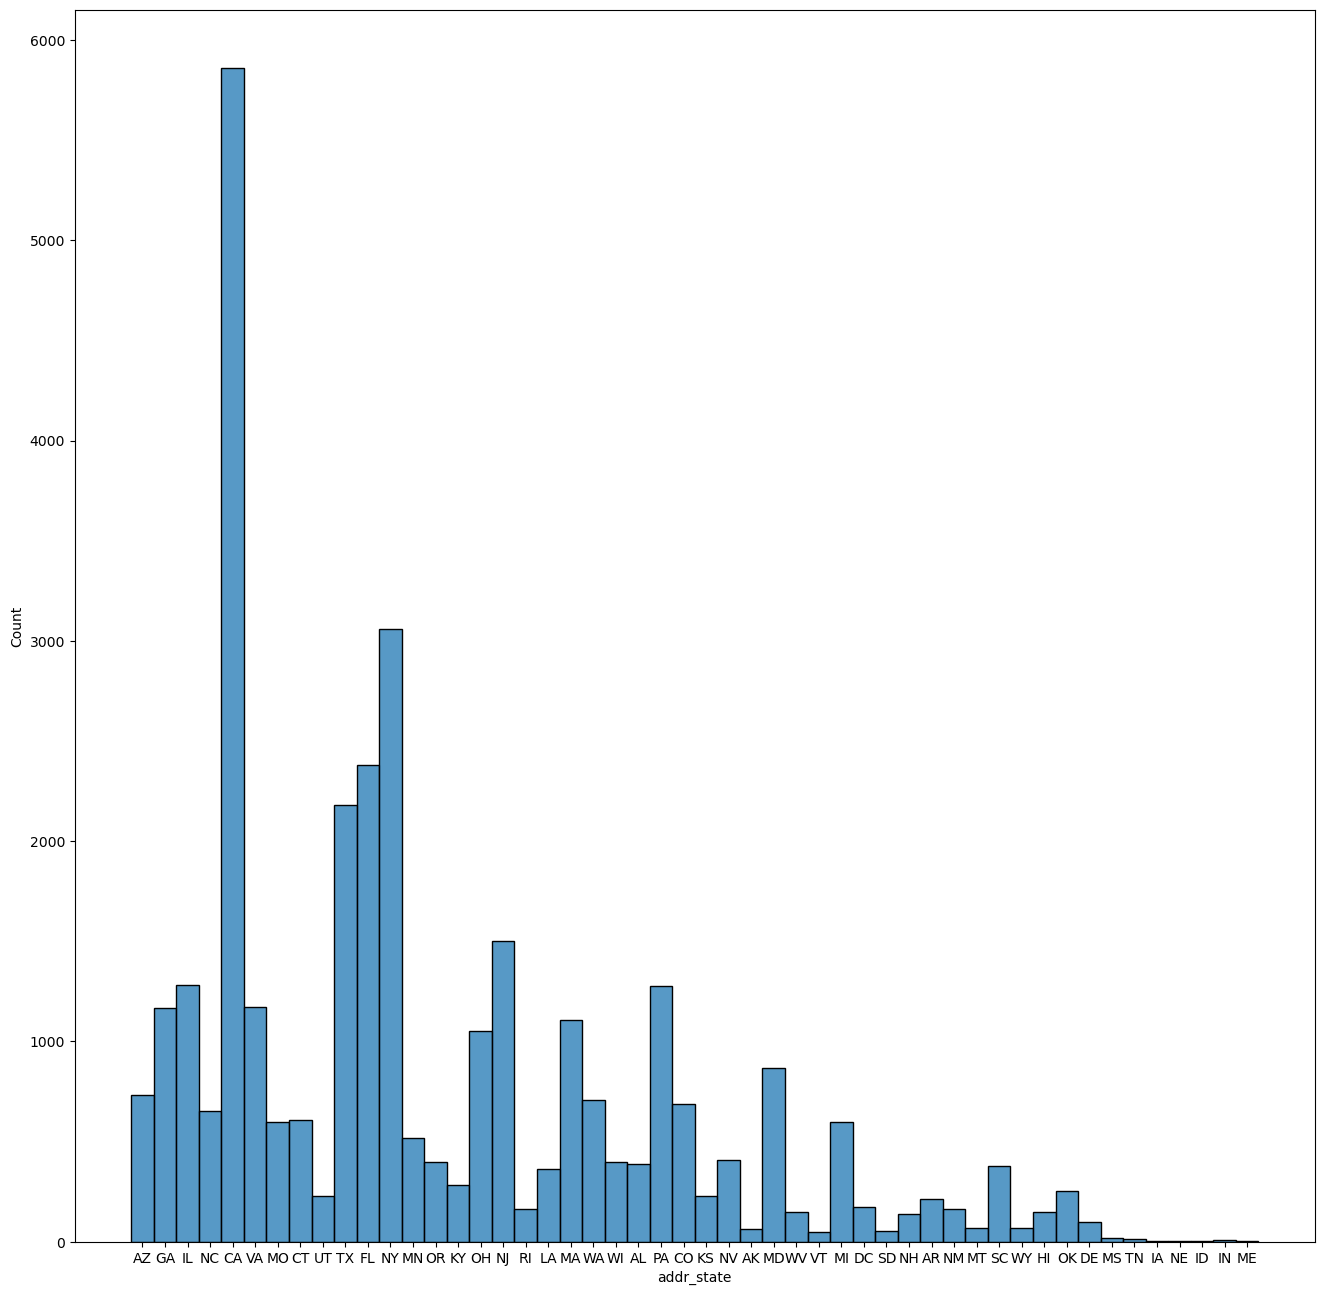

count     32932
unique       50
top          CA
freq       5859
Name: addr_state, dtype: object


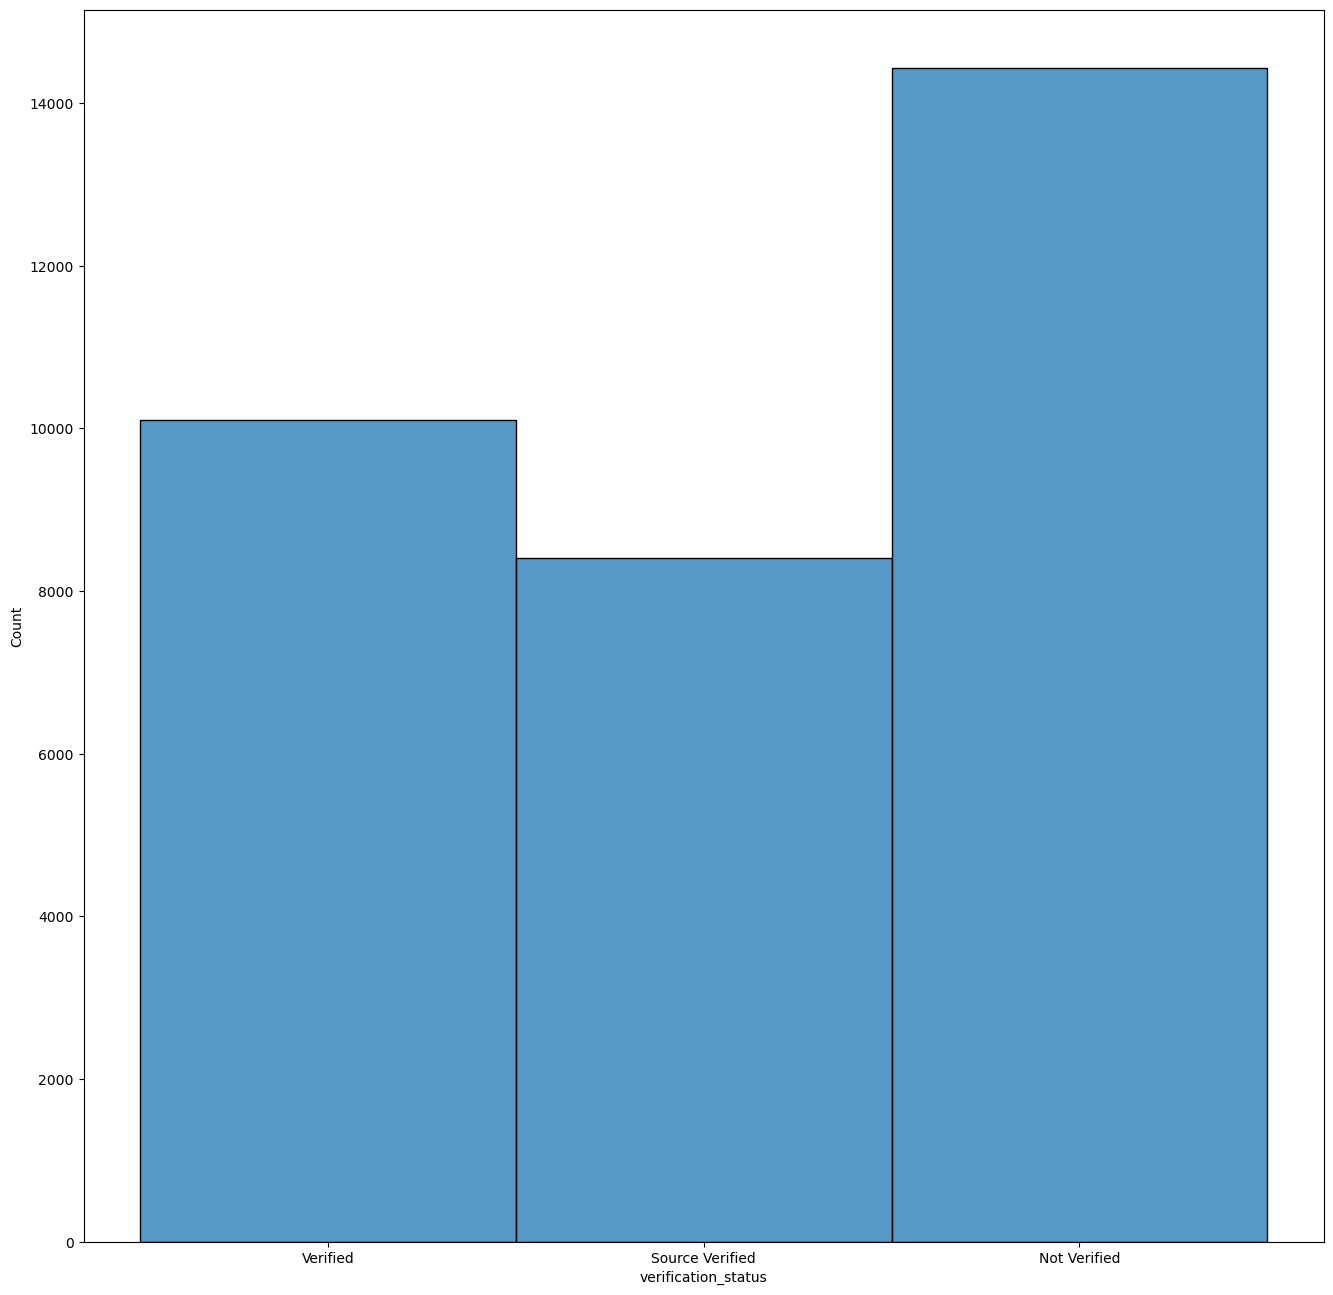

count            32932
unique               3
top       Not Verified
freq             14427
Name: verification_status, dtype: object
Fully Paid     27532
Charged Off     4571
Current          829
Name: loan_status, dtype: int64


In [29]:
#plot graph Cat_cols
for i in Cat_cols:
    plt.figure(figsize=(16,16))
    sns.histplot(Loan_DS[i])
    plt.show()
    print(Loan_DS[i].describe())
    
print(Loan_DS['loan_status'].value_counts())

The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

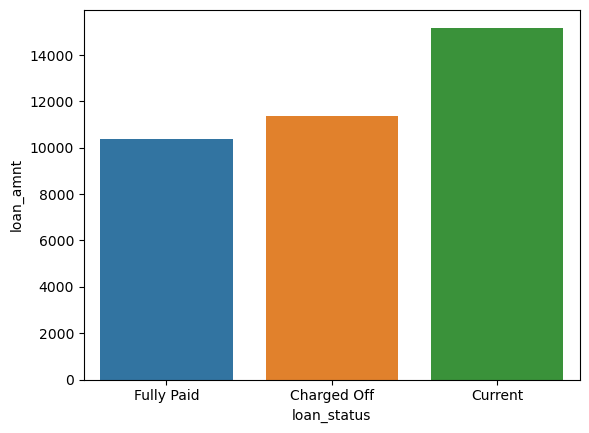

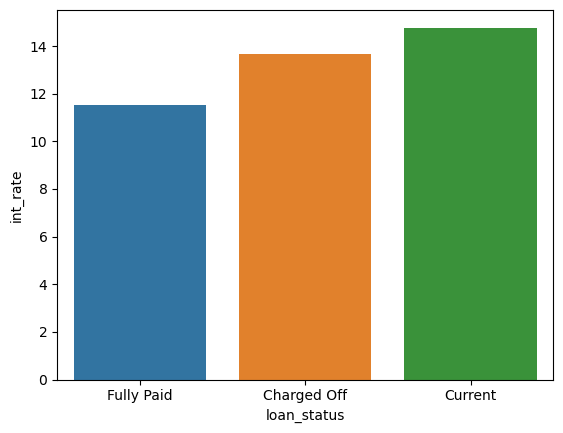

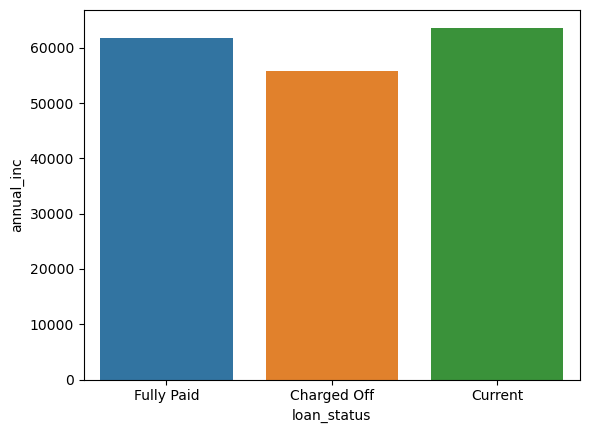

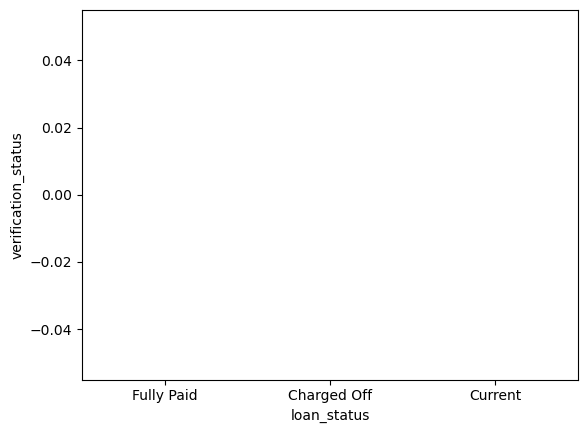

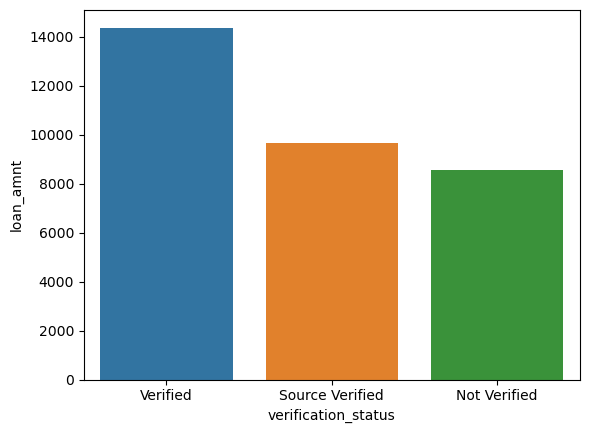

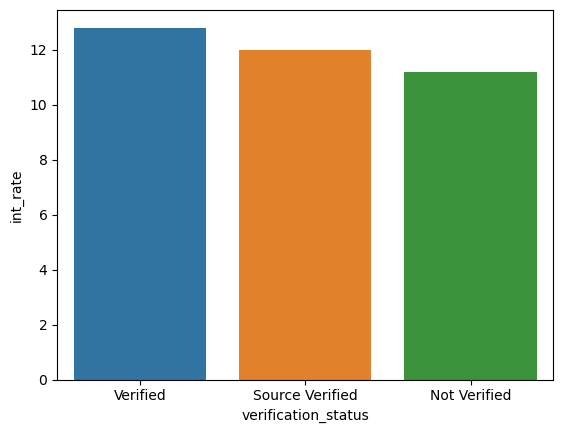

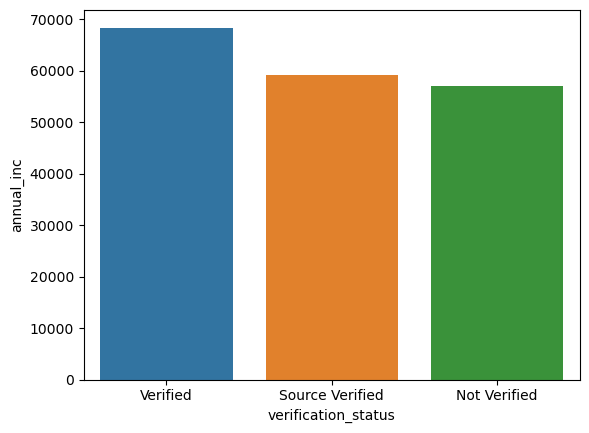

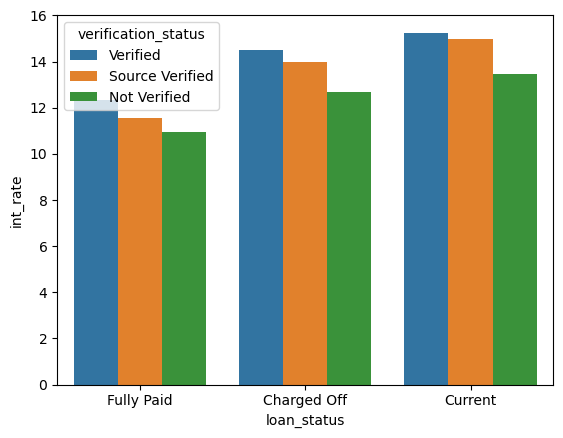

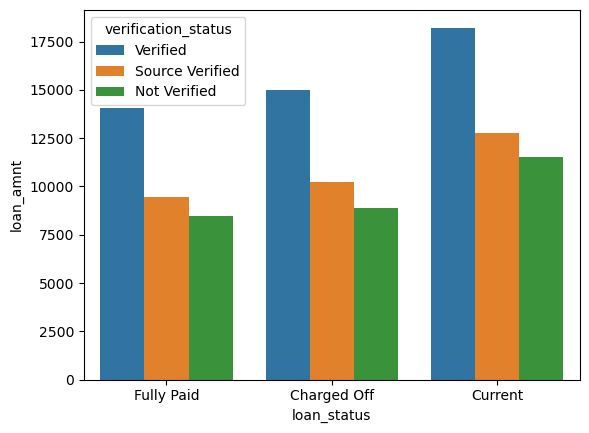

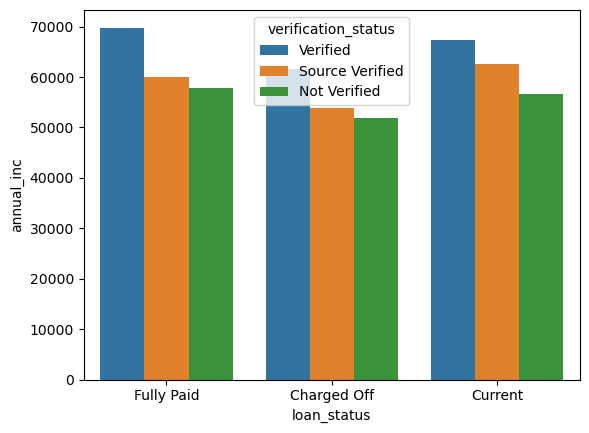

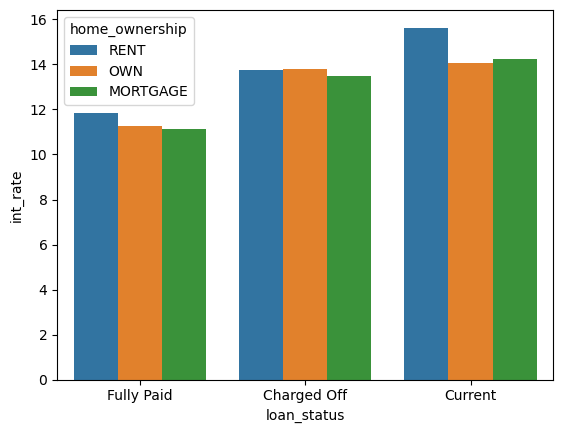

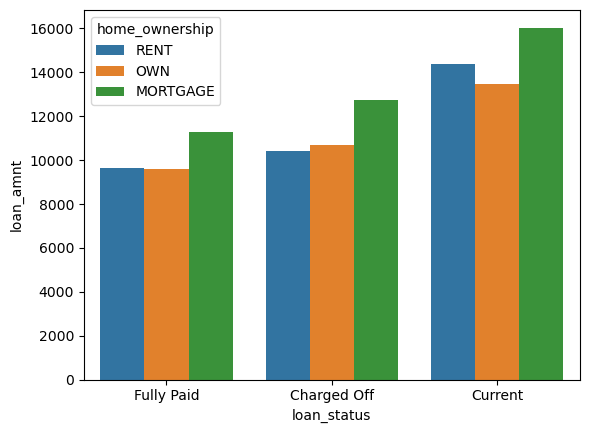

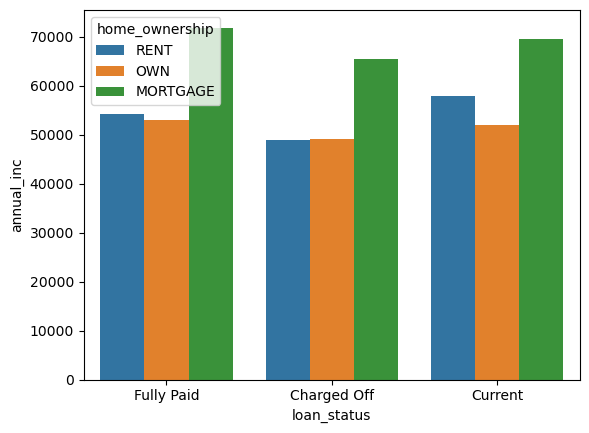

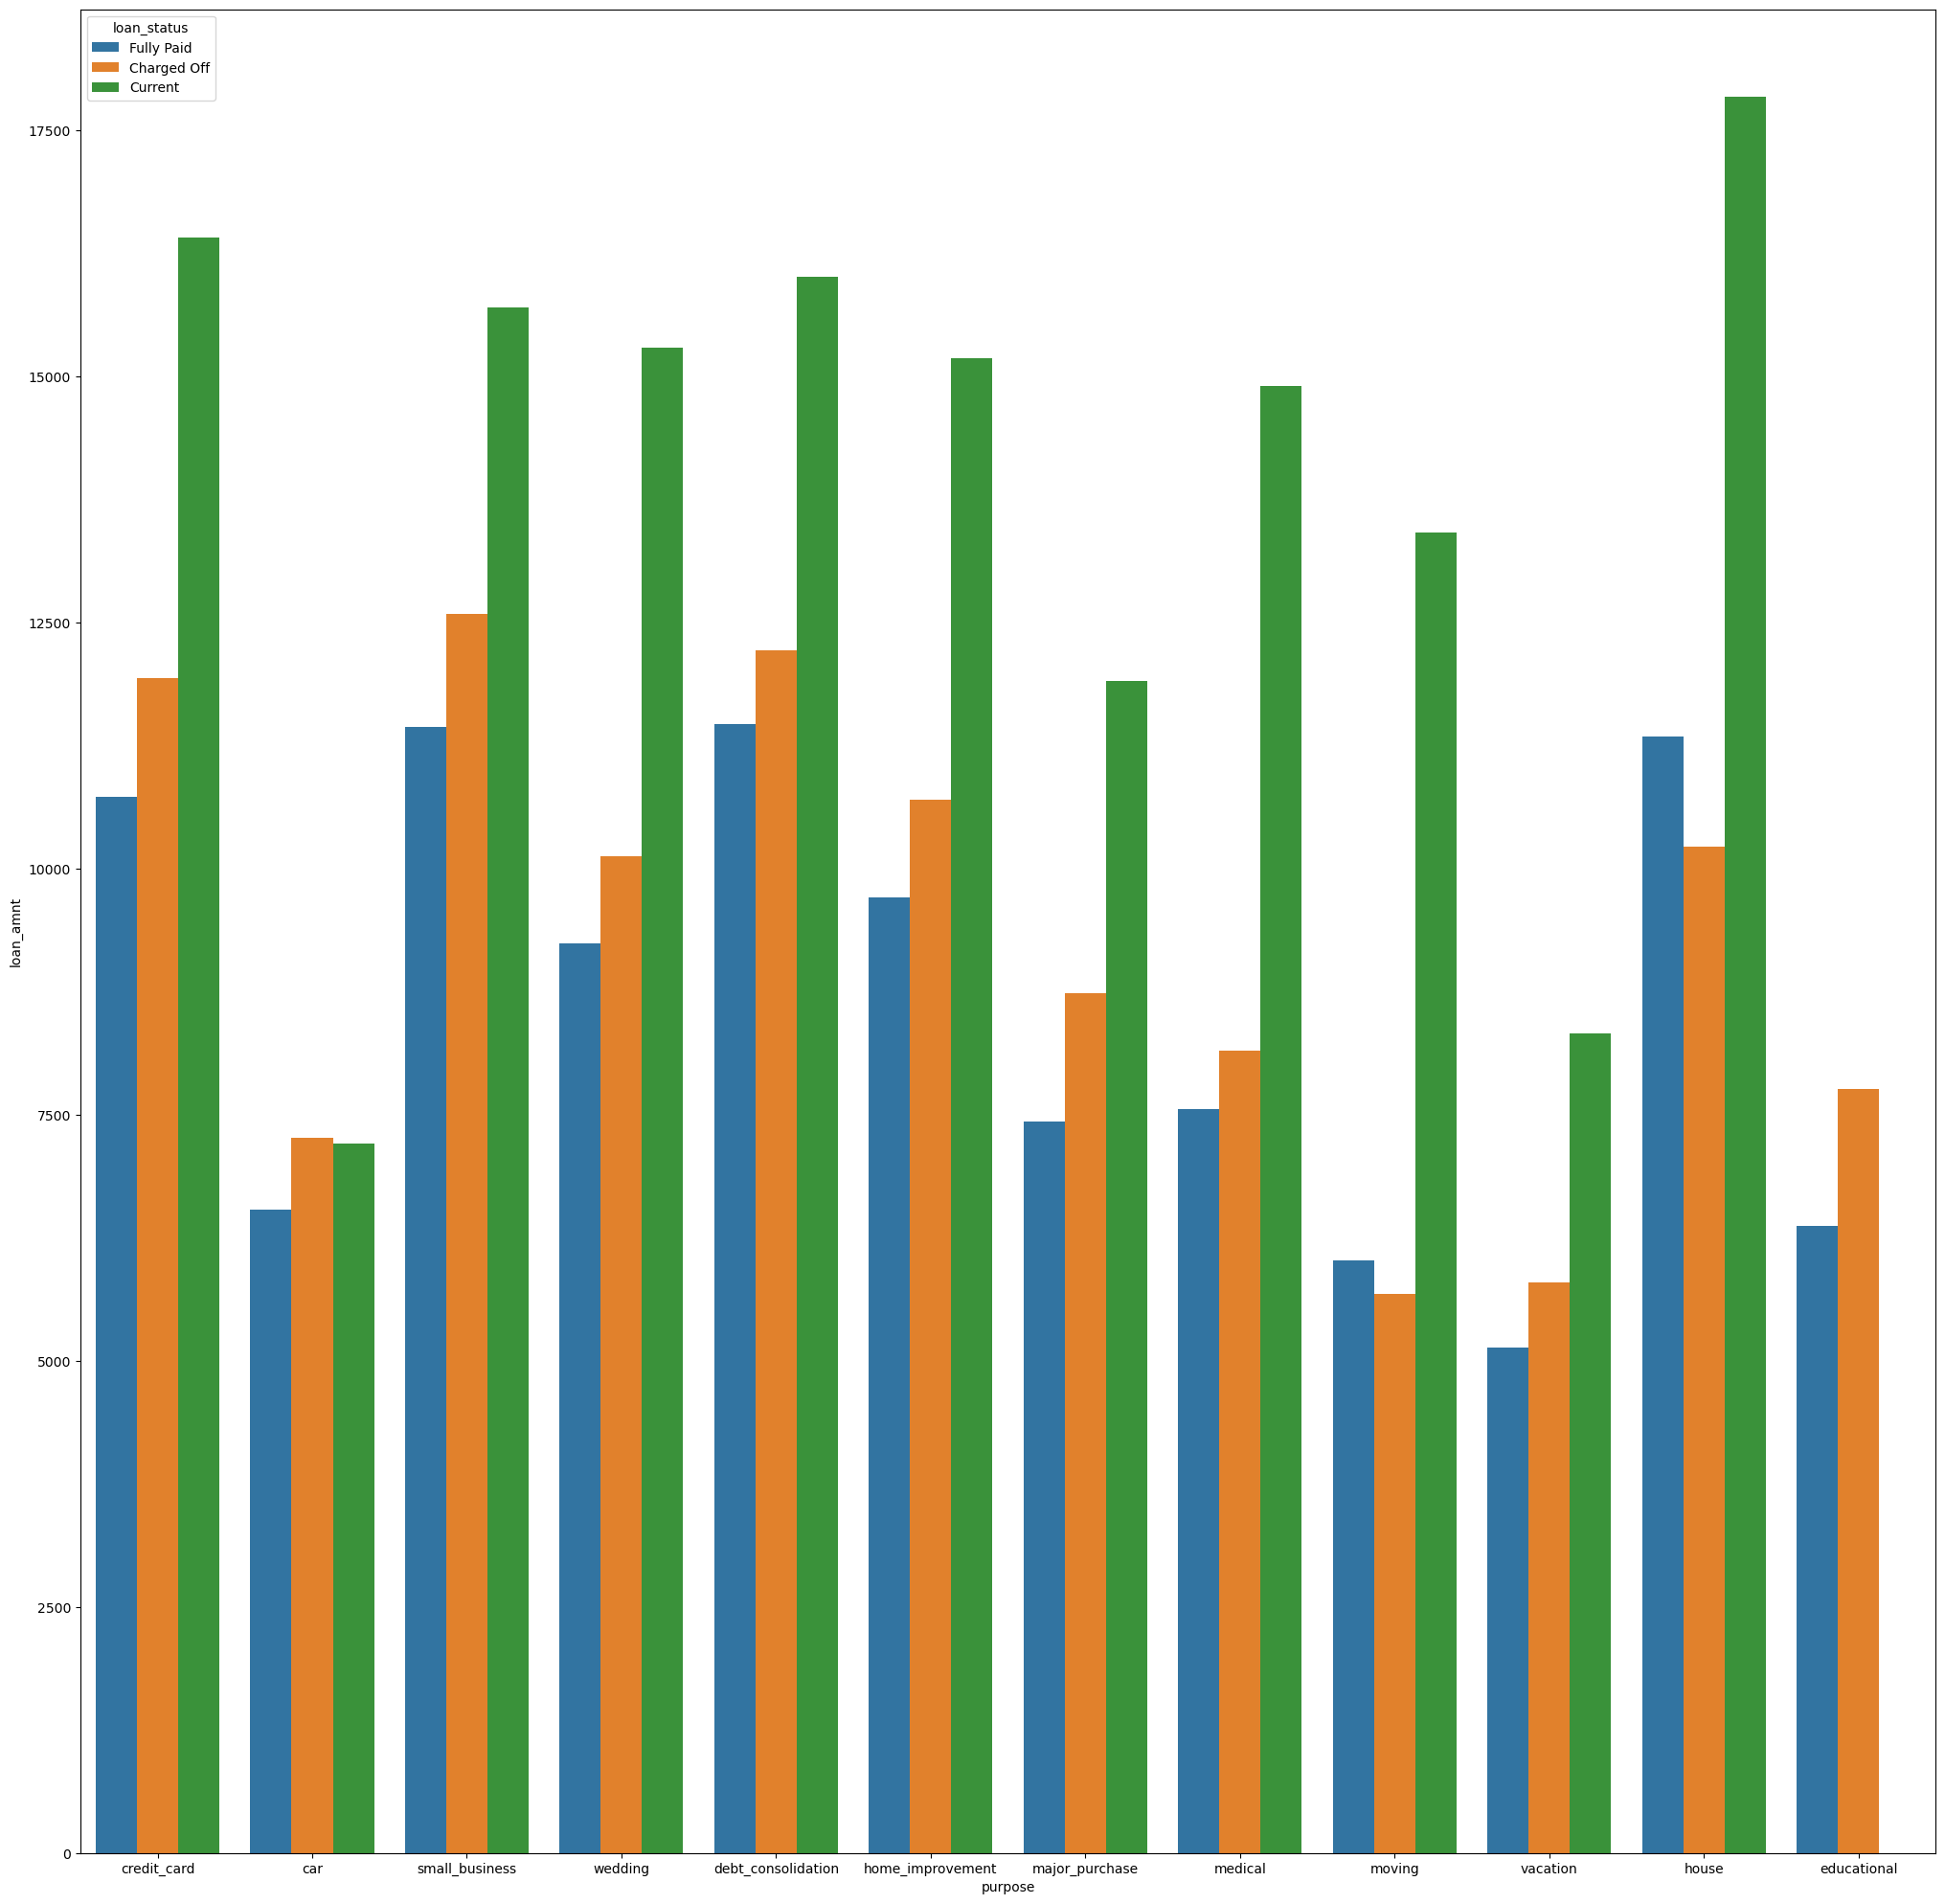

In [38]:
#Analysis 
#how is the loan status with loan amount
#how is the loan status with interst rate
#how is the loan status with annual income
sns.barplot(x=Loan_DS["loan_status"],y=Loan_DS["loan_amnt"],ci=None)
plt.show()

sns.barplot(x=Loan_DS["loan_status"],y=Loan_DS["int_rate"],ci=None)
plt.show()

sns.barplot(x=Loan_DS["loan_status"],y=Loan_DS["annual_inc"],ci=None)
plt.show()

#how is the verification status with loan amount
#how is the verification status with interst rate
#how is the verification status with annual income

sns.barplot(x=Loan_DS["verification_status"],y=Loan_DS["loan_amnt"],ci=None)
plt.show()
sns.barplot(x=Loan_DS["verification_status"],y=Loan_DS["int_rate"],ci=None)
plt.show()
sns.barplot(x=Loan_DS["verification_status"],y=Loan_DS["annual_inc"],ci=None)
plt.show()
#how is the verification and loan status with loan amount
#how is the verification and loan status with interst rate
#how is the verification and loan status with annual income

sns.barplot(x=Loan_DS["loan_status"],y=Loan_DS["loan_amnt"],hue=Loan_DS["verification_status"],ci=None)
plt.show()

sns.barplot(x=Loan_DS["loan_status"],y=Loan_DS["annual_inc"],hue=Loan_DS["verification_status"],ci=None)
plt.show()

sns.barplot(x=Loan_DS["loan_status"],y=Loan_DS["int_rate"],hue=Loan_DS["verification_status"],ci=None)
plt.show()

#how is the home ownership and loan status with loan amount
#how is the home ownership and loan status with interst rate
#how is the home ownership and loan status with annual income
sns.barplot(x=Loan_DS["loan_status"],y=Loan_DS["int_rate"],hue=Loan_DS["home_ownership"],ci=None)
plt.show()

sns.barplot(x=Loan_DS["loan_status"],y=Loan_DS["loan_amnt"],hue=Loan_DS["home_ownership"],ci=None)
plt.show()

sns.barplot(x=Loan_DS["loan_status"],y=Loan_DS["annual_inc"],hue=Loan_DS["home_ownership"],ci=None)
plt.show()

plt.figure(figsize=(25,25))

#how the loan status vary with purpose and amount
sns.barplot(x=Loan_DS["purpose"],y=Loan_DS["loan_amnt"],hue=Loan_DS["loan_status"],ci=None)
plt.show()


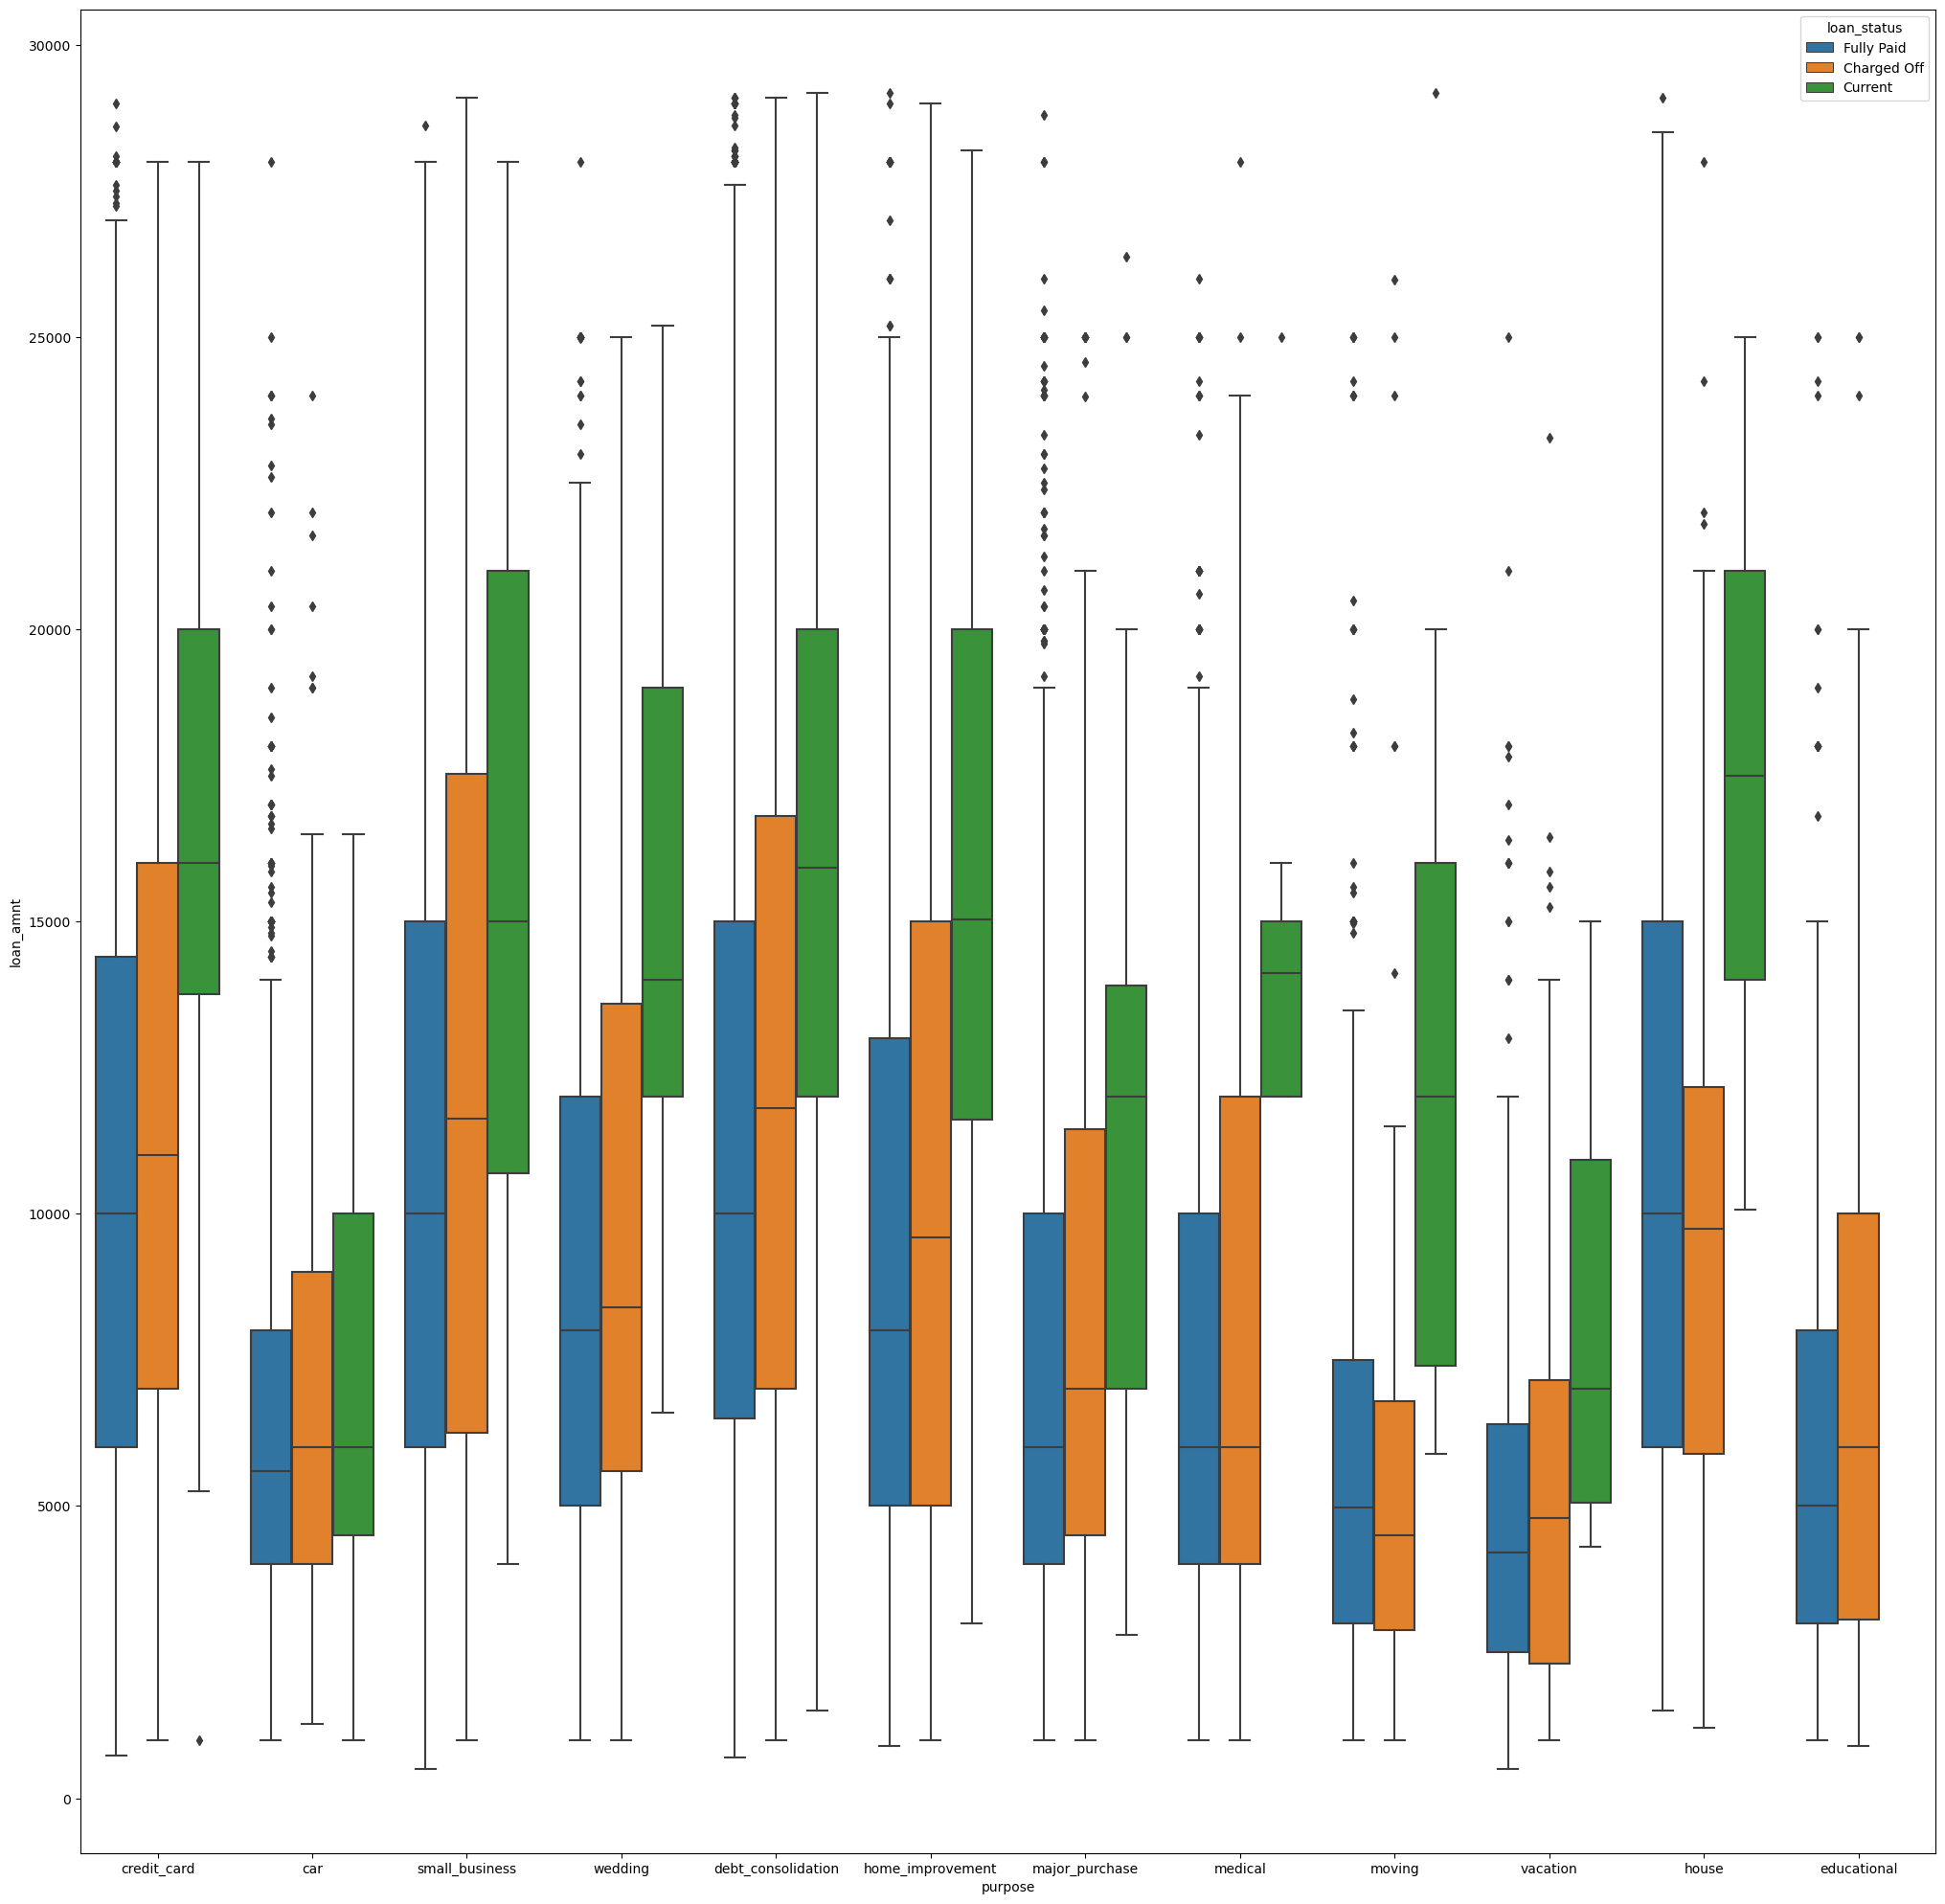

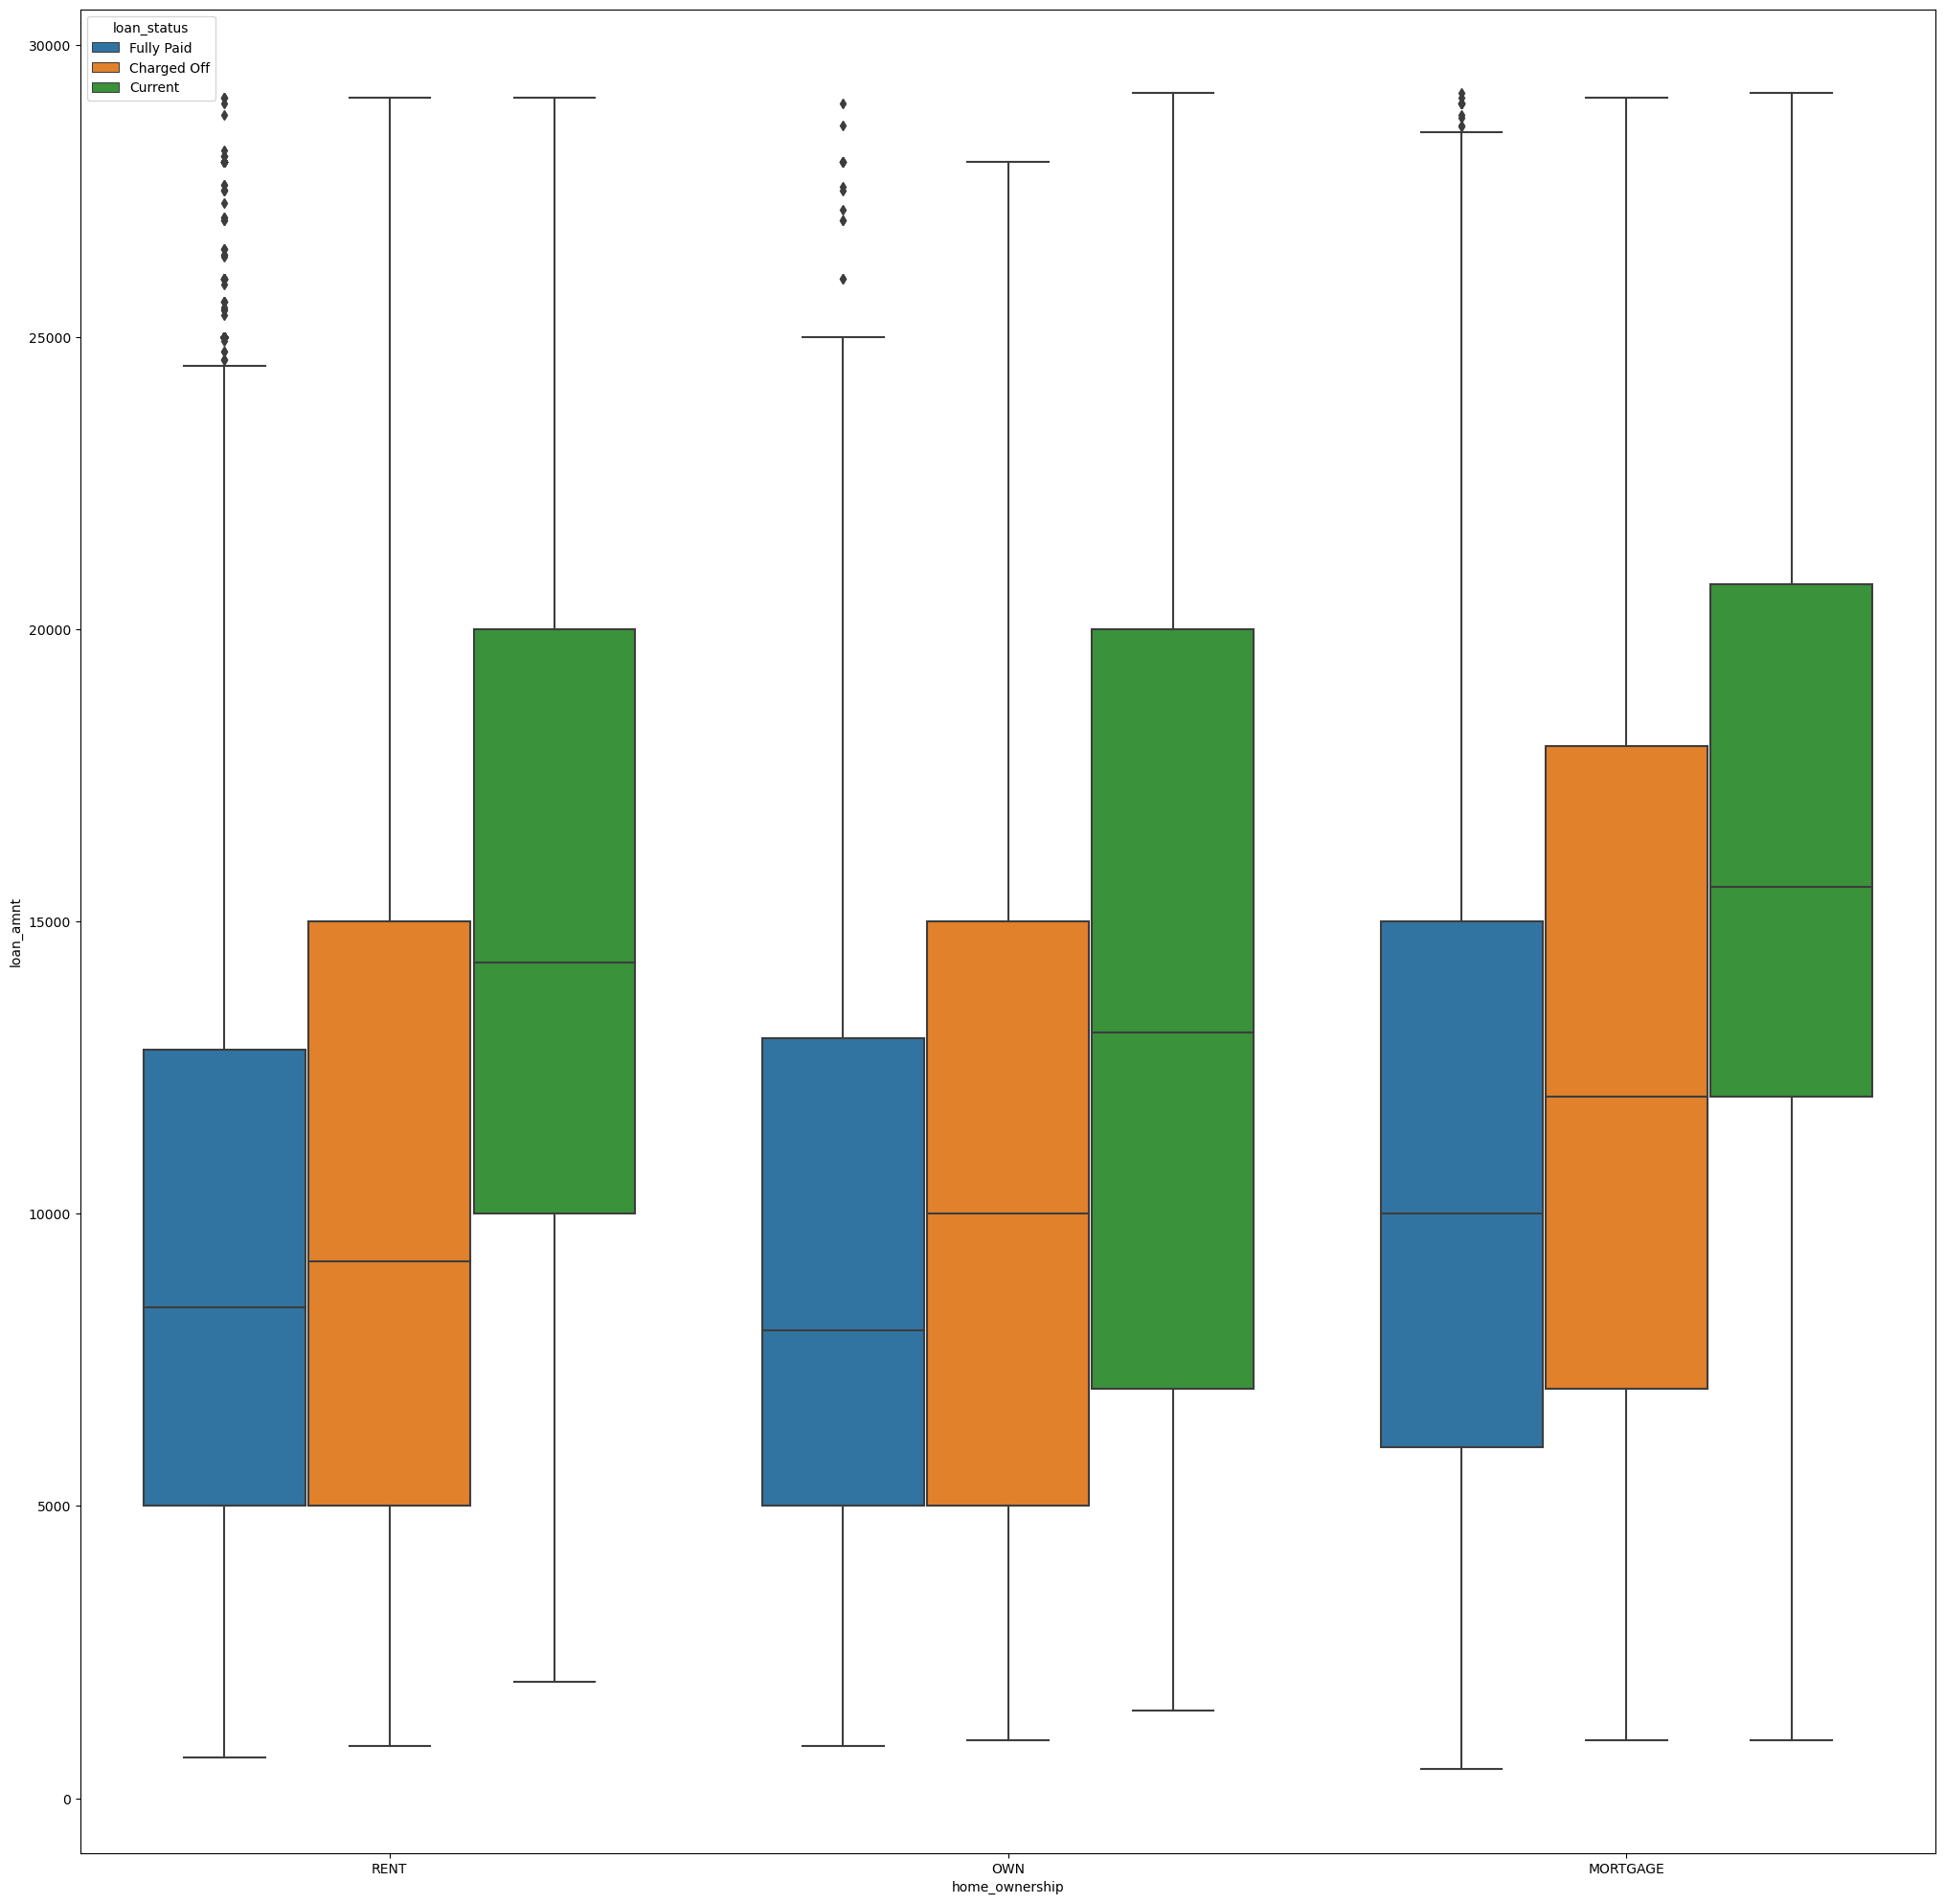

In [39]:
plt.figure(figsize=(25,25))
Loan_DS['loan_amnt'] = Loan_DS['loan_amnt'].astype('float')
sns.boxplot(data =Loan_DS, x='purpose', y='loan_amnt', hue ='loan_status')
plt.show()

plt.figure(figsize=(25,25))
Loan_DS['loan_amnt'] = Loan_DS['loan_amnt'].astype('float')
sns.boxplot(data =Loan_DS, x='home_ownership', y='loan_amnt', hue ='loan_status')
plt.show()